In [ ]:
# !cp '/content/drive/My Drive/Colab Notebooks/sudoku/extractsudokupuzzle.py' .
# !cp '/content/drive/My Drive/Colab Notebooks/sudoku/extractsudokucell.py' .
# !cp '/content/drive/My Drive/Colab Notebooks/sudoku/digitrecognition.py' .
%cd /content/drive/My Drive/Colab Notebooks/sudoku

/content/drive/My Drive/Colab Notebooks/sudoku


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from extractsudokupuzzle import ExtractSudokuPuzzle
from extractsudokucell import ExtractSudokuCell
from digitrecognition import sudoku

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def print_grid(arr):
    for i in range(9):
        for j in range(9):
            print(arr[i][j], end=' ')
        print()

In [ ]:
def find_empty_location(arr,l):
    for row in range(9):
        for col in range(9):
            if(arr[row][col]==0):
                l[0]=row
                l[1]=col
                return True
    return False

In [ ]:
def used_in_row(arr,row,num):
    for i in range(9):
        if(arr[row][i] == num):
            return True
    return False

In [ ]:
def used_in_col(arr,col,num):
    for i in range(9):
        if(arr[i][col] == num):
            return True
    return False

In [ ]:
def used_in_box(arr,row,col,num):
    for i in range(3):
        for j in range(3):
            if(arr[i+row][j+col] == num):
                return True
    return False

In [ ]:
def check_location_is_safe(arr, row, col, num):
    return not used_in_row(arr, row, num) and not used_in_col(arr, col, num) and not used_in_box(arr, row - row % 3, col - col % 3, num)

In [ ]:
def solve_sudoku(arr):
    l = [0, 0]
    if (not find_empty_location(arr, l)):
        return True
    row = l[0]
    col = l[1]
    for num in range(1, 10):
        if (check_location_is_safe(arr, row, col, num)):
            arr[row][col] = num
            if (solve_sudoku(arr)):
                return True
            arr[row][col] = 0
    return False

In [ ]:
def SolveSudoku(img_to_be_processed):

  postProcessedExtracted = ExtractSudokuPuzzle(img_to_be_processed)

  try:
    cellImagesbyFeatures = ExtractSudokuCell(postProcessedExtracted, check=True)
    grid = sudoku(cellImagesbyFeatures)

    if solve_sudoku(grid):
      return grid
  except:
    pass
  
  try:
    cellImagesbyContours = ExtractSudokuCell(postProcessedExtracted, check=False)
    grid = sudoku(cellImagesbyContours)

    if solve_sudoku(grid):
      return grid
  except:
    return None
  
  return None

In [ ]:
img_to_be_processed = cv2.imread('/content/drive/My Drive/Colab Notebooks/sudoku/img/1.jpg', cv2.IMREAD_GRAYSCALE)

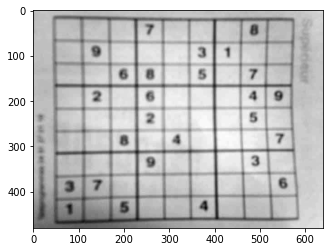

In [ ]:
plt.imshow(img_to_be_processed, cmap='gray')
plt.show()

In [ ]:
result=SolveSudoku(img_to_be_processed)
if result is not None:
  for x in result:
    print(x)
else:
  print("Cannot solve sudoku")

[2, 5, 3, 7, 1, 6, 9, 8, 4]
[8, 9, 7, 4, 2, 3, 1, 6, 5]
[4, 1, 6, 8, 9, 5, 2, 7, 3]
[7, 2, 1, 6, 5, 8, 3, 4, 9]
[9, 6, 4, 2, 3, 7, 8, 5, 1]
[5, 3, 8, 1, 4, 9, 6, 2, 7]
[6, 4, 2, 9, 7, 1, 5, 3, 8]
[3, 7, 9, 5, 8, 2, 4, 1, 6]
[1, 8, 5, 3, 6, 4, 7, 9, 2]


In [ ]:
# import base64
 
# with open("/content/drive/My Drive/Colab Notebooks/sudoku/img/p.jpg", "rb") as imageFile:
#     str = base64.b64encode(imageFile.read())
#     print(str)

In [ ]:
# type(str)

In [ ]:
# string = '/9j/4AAQSkZJRgABAQEAYABgAAD/4QAWRXhpZgAASUkqAAgAAAAAAAAAAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGnAYkDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigDK8ReItN8K6JPq2rTmK1hwCQpZmY9FUDqSf/r4Fcn4S+MnhfxjrK6TaC9tLuQExLeRqolIGSFKs3OBnnHtVj4rW+gXvg8WXiDVX0qKe5Rba8WJnEcwyVJCjpgHqQPcV5/YeKdV0vxhoVtrus+FfGVvcXot7S4tBHJd2eSAHG1RszwT948de9ENZWf8AX/BCekbo95orxzR7iGHVvi6ZZo4wpyS7AYHlOM/nXL2aLqfgz4YeHb+aSPRNRuZvtiK5QTFXJRCw7Enp64I5ApRfNbz5f/Jv8gel/K/4Httt4ssLrxneeFkiuRfWlutzJIyr5ZVsYAOc55Hat6vCtNtIPCXxM8ZxeHXkl+w+Hy9vE8pm8l1CkRgsScDA4Prisi60jTdK+FeleP8ATtSuj4ulmjk+2m6eR7mVmw8RUnBAGQRjOF5zzTi00n/WraX5BZ3a/rRJv8z3CDxTY3HjK68LpFcC+trVbp5Cq+WUJAABznPPpW5Xzz481LxBZ/EXxBLpFlK8smgxfbZImAe2gypkZc/xdvUcntXQeI4tEs7b4XDQQkeknU42gPTIYA5bP8RJ5zznNEdUr97ffJr+u+om7X9L/gmezUV5docscv7RHiPy5FfZpUSttOcEFMg+9HxXRdT8R+DfDt/NJHomo3r/AGxFcoJioUohYdiT09cEcgUlqo+f+dh9ZeX+Vzs7bxZYXXjO88LJFci+tLdbmSRlXyyrYwAc5zyO1b1eD2drB4Q+I/jaLw7JK/2Hw8Wt42lMxgdQpCAsScDjAJ4rltOttZh0LSPFGm+H/s2rSzo//CQ3HiWIfbGJO6No5GA+bBG3r8vOecuPvW/rdtfp/kDur/10T/X/ADPqGivAviH4fv8AV/HWq3kmm23iixhswWsYNWEN1peE5IQNwSfmxsfd6evqnw51O21fwBpN3aS30sJiKBr5w82VYqQzAANgggHHIA70R1jf+uv+QPR2/roc1r/x08MeHNevNHvLHV3uLSQxyNDDGUJ9iZAf0rpfBHj3SvH1jdXelW95DHbSCNxdIqkkjPG1m4rnvjd/yJdj/wBhW2/maZ8V3ttQ1Hw54ck0+61ObUJ5GSxW/FpbyhFHMr7Sx25yFUjPPU4FKLdu7vb8E/1B/F5Wv+f+R6bRXzho17q/hv4a/ESztLiOKTT7uOGNbCWR4oNzbZPKZiWA68k5z71oal4V8PeGtY+GraHcSf6XeRSyR/aWkSbIT99tJIBPAyoA/KqWrS9PxE3aLfr+B7/RXzbqEOoeLPEvi+5v/DEutS6fdSQw3L64tkNMjXO0rGxxjjduPBIPvWv4gtPEfibwH4Niu7rTdRv90gn0mbVUX+0wG2q6ukgEhAGThuCe54qVqk+9vxKas2vX8D2fxHr1r4Y8P3ms3sc0ltaoHdYQC5GQOASB39auWN5HqGn217EGWO4iWVA4wQGAIz7814doiWc3w78e+GorO90a4tCd+n6jqEclvbMxJURzMFABI/iJHQ7jkmvcNOWNNMtEhdXiWFAjo24Mu0YIPce9Vbf5fjcnrb1/Qs0UUUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBU1PS7DWtOl0/U7SK6tJhh4pV3A+/sR1B6g1z2g/DLwd4a1EahpWhxQ3ajCSvLJKU913sdp9xzXWUULR3QPXRnK6t8NvB+ua0+r6locFxfOu15GdwH4xkqCFJx3IzwPQVPP4C8MXXhiDw3PpMcmkwHdDA0jkxnJOVfO4Hk856EjpXR0UdLB1uc7oPgTwz4YvmvdF0qOzuHgFuzJI53IMdQSQTwMnqe5qrafDLwZY68NatvD9rHfK/mKwLFEb1WMnYpHUYHB5FdZRR1uFuhlr4d0ldeuNbFoDqNzALaaUuxDxj+HaTt7elZkvw78KT+GYvDsukq+lRSmWKBppD5bkkkq27cvU8A9zXT0UW6Ac7oPgTwz4YvmvdF0qOzuHgFuzpI53IMdQSQTwOep7mrviDw3o/inTf7P1uwjvLbcHCsSpVh3VgQVPbgjgkVq0UPXcFpsc5oXgPwx4ZvXvNG0mO0neAW7skjkMgxwQSQTwMnqe5qpa/C/wVZa4NZt/D9sl6r+YrbnKK3qsZOwY7YHHauuoo63C2ljl/EXw68J+K71b3WdGiuLpV2+asjxMw/2ijDdjtnOK6GzsrbTrOGzs4I7e2hUJHFGu1VA7AVPRQtFZBvqZuueH9M8R2SWerW32iCOVZlTzGTDr0OVINVfEvg/QPF9tDBrunJeJAxeLLsjISMHDKQcHuM44HpW5RRYPM5GfwTp+i6FrMfhTR9NivL+JVe3uw7W020Y2sgbAypIyMZJyc1534Y+H2rt4h8PtJ4IsvDVnps5vLu4W/W6a6lCgKq/MzKM5IUsQMnnPX3KimnZ3/rTYGrq39anK698N/CHibUxqOraJDPeYAMqyPGXx03bGG705zxxV3WfBvhzxBpMGlanpFtLZW+BBEoMflAdkKYKjgcAit2ilbSwdbnN2vgDwvY+G7nw9baTHFpl0czxLI+6TnPL7t5/P2rftbaKztIbW3TZDCixxrknCgYAyeegqWigLBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV5bqnx58MaTrN/pc2m61JPZXElvK0UERUsjFSRmQHGQeoFAHqVFeR/8ADRHhT/oE6/8A+A0X/wAdo/4aI8Kf9AnX/wDwGi/+O0AeuUV5H/w0R4U/6BOv/wDgNF/8do/4aI8Kf9AnX/8AwGi/+O0AeuUV5H/w0R4UP/MJ1/8A8Bov/jtH/DRHhT/oE6//AOA0X/x2gD1yivI/+GiPCn/QJ1//AMBov/jtH/DRHhT/AKBOv/8AgNF/8doA9coryP8A4aI8Kf8AQJ1//wABov8A47R/w0R4U/6BOv8A/gNF/wDHaAPXKK8j/wCGiPCn/QJ1/wD8Bov/AI7R/wANEeFP+gTr/wD4DRf/AB2gD1yivI/+GiPCn/QJ1/8A8Bov/jtI37RXhNcbtK14Z9beL/47QB67RXkf/DRHhT/oE6//AOA0X/x2j/hojwp/0Cdf/wDAaL/47QB65RXkf/DRHhT/AKBOv/8AgNF/8do/4aI8Kf8AQJ1//wABov8A47QB65RXkf8Aw0R4U/6BOv8A/gNF/wDHaP8Ahojwp/0Cdf8A/AaL/wCO0AeuUV5H/wANEeFP+gTr/wD4DRf/AB2j/hojwp/0Cdf/APAaL/47QB65RXkf/DRHhT/oE6//AOA0X/x2j/hojwp/0Cdf/wDAaL/47QB65RXkf/DRHhT/AKBOv/8AgNF/8do/4aI8Kf8AQJ1//wABov8A47QB65RXkf8Aw0R4U/6BOv8A/gNF/wDHaP8Ahojwp/0Cdf8A/AaL/wCO0AeuUV5Ev7RXhNvu6Vrxx6W8X/x2l/4aI8Kf9AnX/wDwGi/+O0AeuUV5H/w0R4U/6BOv/wDgNF/8do/4aI8Kf9AnX/8AwGi/+O0AeuUV5H/w0R4U/wCgTr//AIDRf/HaP+GiPCn/AECdf/8AAaL/AOO0AeuUV5H/AMNEeFP+gTr/AP4DRf8Ax2j/AIaI8Kf9AnX/APwGi/8AjtAHrlFeR/8ADRHhT/oE6/8A+A0X/wAdo/4aI8Kf9AnX/wDwGi/+O0AeuUV5H/w0R4U/6BOv/wDgNF/8do/4aI8Kf9AnX/8AwGi/+O0AeuUV5H/w0R4U/wCgTr//AIDRf/HaP+GiPCn/AECdf/8AAaL/AOO0AeuUV5dpXx48MavrVjpcGm61HPezpbxtLBGFDMwUE4kJxk9ga9RoAKKKKACiiigAryH4RAHx98SsgH/ibn/0bPXr1eRfCL/kfviV/wBhc/8Ao2egD1zav90flRtX+6PypaKAE2r/AHR+VG1fQflS0UAZuhKv9jw8D7z9v9tq0dq/3R+VZ+hf8geH/ef/ANDatGgBNq/3R+VG1f7o/KlooAoa0q/2FqHyj/j2k7f7Jq6qrsHyjp6VT1r/AJAWof8AXtJ/6Caur9wfSgA2r/dH5UbV/uj8qWigBNq/3R+VeQ/HwAaV4awB/wAhZP8A0E16/XkPx8/5BXhr/sLJ/wCgmgD13avoPyo2r/dH5UtFACbV/uj8qNq/3R+VLRQBnXCr/b1hwP8AUT9veOtDav8AdH5VQuP+Q9Yf9cJ/5x1oUAJtX+6Pyo2r/dH5UtFACbV/uj8qzrZR/buocD/VQ9v9+tKs62/5D2of9cof/Z6ANDav90flVDUNY0jSSo1HUbKzL/dFxOke76ZIq9IzJE7KpdgpIUdz6V5N4H+G0Ws219r3j7Sjda5fXLkx3bEiGMfdCgHA7/QYxigD1W3mtruBJ7aWKaFxlZI2DKw9iODUu1fQflXjvgG3j8M/GbxH4V0aV20MWq3PkFy628vycAn/AHiPXpnpXsdAHkHwBAOh+IsgH/ibP/6CtevbV/uj8q8i+AH/ACA/EX/YWf8A9BWvXqAIbme2s7aS5upYoII13PLKwVVHqSeAKWCW3ureO4t5IpoZFDJJGQysD0II6ivFfiprF34xtNd0rSZzHomgwGbUblRkT3A+7AD3APJ9x7DPpXw8/wCSceG/+wdB/wCgCgDoZFXyn+UdD2qpoyr/AGHp/A/49o+3+yKuyf6p/wDdNU9G/wCQFp//AF7R/wDoIoAu7V/uj8qNq/3R+VLRQAm1f7o/Ks7XVX+x5uB95O3+2taVZ2u/8geb/eT/ANDWgDQ2r6D8qNq/3R+VLWJ4oTxJJpar4Wl0+O+Mo3tfhigjwc42/wAWce3WgDSS9sZL6WxS5t2u4lDyQK4Lop6Er1ANWNq/3R+VeJ/CmDWLb4t+MIdfu47vVFgj8+aL7jEkEbeBgAEDGB0r22gDyH4sgD4i/DbAA/4mf/tWGvXq8h+LX/JRvhr/ANhP/wBqQ169QAUUUUAFFFFABXkXwi/5H74lf9hc/wDo2evXa8h+EX/I/fEr/sLn/wBGz0AevUUUUAFFFFAGdoX/ACB4f95//Q2rRrO0L/kDw/7z/wDoZrRoAKKKKAKOtf8AIC1D/r2k/wDQTV1fuD6VS1r/AJAWof8AXtJ/6Caur9wfSgBaKKKACvIfj5/yCvDX/YWT/wBBNevV5D8fP+QV4a/7Cyf+gmgD16iiigAooooAz7j/AJD1h/1wn/nHWhWfcf8AIesP+uE/8460KACiiigArOtv+Q9qH/XKH/2etGs62/5D2of9cof/AGegDRJABJ4Aryi48TeKviNqF3p/gqRNL0K3kMM+tyjLysOohH9evQ5WvT7+1+3addWnmtF58LxeYnVNwIyPcZry+x+CkumWi2lh468Q2tuhJWKCXYgJ5OADigDsPBngXSvBNnMlkZbi8uW33V7cNulmb3PYZJ49+55rqK4vwr4Du/DertfT+LNa1VDE0f2e9mLICSDuxnqMfrXaUAeQ/AD/AJAfiL/sLP8A+grXb/EC41638F358NW7z6rIBHEIx8yBjhmHuBkiuI+AH/ID8Rf9hZ//AEFa9eoA+fb7UdZ0H4Tah4dT4f6lZ2ptW+0X81wpy5+9Iwxzk/pgdq9C+Ems6lqHhDT7O80K4sLe0sYFt7qSQMt0NuNygDjoD+Ndb4i0WLxF4dv9HmleGO8hMTSIASoPcZp+haTHoWg2GkxStLHZwJAruMFgoxk4+lAF6T/VP/umqejf8gLT/wDr2j/9BFXJP9U/+6ap6N/yAtP/AOvaP/0EUAXqKKKACs7Xf+QPN/vJ/wChrWjWdrv/ACB5v95P/QxQBo0UUUAeT+DP+S9eOv8ArjD/AOgpXrFczpPgy20nxrrPiaO7lkn1REV4WUbU2gDg9e1dNQB5D8Wv+SjfDX/sJ/8AtSGvXq8h+LX/ACUb4a/9hP8A9qw169QAUUUUAFFFFABXjPwsmuYfH3xI+z2huM6u2cSBcfvZvWvZq8h+EX/I/fEr/sLn/wBGz0Aem/bdS/6BJ/8AAhKPtupf9Ak/+BCVo0UAZ323Uv8AoEn/AMCEo+26j/0CT/4EJWjRQBz2iXmoDSYQullhl+fPX++a0Ptupf8AQJP/AIEJRoX/ACB4f95//QzWjQBnfbdS/wCgSf8AwISj7bqX/QJP/gQlaNFAGDrF5qJ0S/B0ogG2kyftCcfKauLe6ltH/EpPT/n4SpNa/wCQFqH/AF7Sf+gmrq/cH0oAz/tupf8AQJP/AIEJR9t1L/oEn/wIStGsLWvF+i+H9V0zTNQuil5qUoitokUsSSQMnHQZIGTQBc+26l/0CT/4EJXk/wAdLi7l0vw551iYcaqhH71Wydp44r2mvIfj5/yCvDX/AGFk/wDQTQB6ab3Uc/8AIJP/AIEJR9t1L/oEn/wIStGigDO+26l/0CT/AOBCUfbdS/6BJ/8AAhK0aKAOfnvNQ/tyxJ0s58mbA89eeY6v/bdS/wCgSf8AwISluP8AkPWH/XCf+cdaFAGd9t1L/oEn/wACEo+26l/0CT/4EJWjRQBnfbdS/wCgSf8AwISs+3vNQGt35GlkkxQ5Hnrx9+uhrOtv+Q9qH/XKH/2egA+26l/0CT/4EJR9t1L/AKBJ/wDAhKuzzR21vJPK22OJS7tjoAMmuE/4XV8P/wDoPj/wFm/+IoA677bqX/QJP/gQlH23Uf8AoEn/AMCErE0L4l+EfEuqx6ZpGrC5vJFZlj8iRcgDJ5ZQOldZQB4t8Cbi7i0TxAIbEzA6q5J81Vwdq8c16x9t1L/oEn/wISvMvgB/yA/EX/YWf/0Fa9eJABJOAKAM77bqX/QJP/gQlH23Uv8AoEn/AMCErkb340eBbG+e1fV2lMbbXkggeSNT/vAYP4Zrs9L1Wx1rTodQ026iurSYZSWM5B/wPtQBBJe6j5b/APEpPQ/8vCVU0i81EaLYBdKJH2ePB89OflFbkn+qf/dNU9G/5AWn/wDXtH/6CKAGfbdS/wCgSf8AwISj7bqX/QJP/gQlW7u7t7C0lu7ueOC3hUvJLI21VUdSTXCQ/GvwHNei2GsMgZtqzPbyLGT/ALxHA9zxQB2H23Uv+gSf/AhKz9bvNQOkzBtLKjcnPnr/AHxW/HIksayRuro4DKynIIPQg1Q13/kDzf7yf+hrQAfbdR/6BJ/8CEo+26l/0CT/AOBCVo0UAZ323Uv+gSf/AAISj7bqX/QJP/gQlaNFAHjPxPmuZviL8OPtFobfGpjGZA2f3sPpXs1eQ/Fr/ko3w2/7Cf8A7Uhr16gAooooAKKKKACvIvhF/wAj98Sv+wuf/Rs9eu15F8Iv+R++JX/YXP8A6NnoA9dooooAKKKKAM7Qv+QPD/vP/wChtWjWdoX/ACB4f95//Q2rRoAKKKKAKOtf8gLUP+vaT/0E1dX7g+lUta/5AWof9e0n/oJq6v3B9KAMvxH4gsPC+g3WsajJst7dM47u3ZR6knivCdX0nU38U+CvFevhk1fWdZjYW+TttbcMnlxAevJJ+vrmvRviP4Q8T+JtZ0S60afTGtNOYzta6gX8t5s/KxVR82B6n+ZrgPiBF8Q113wf/bU+gtcnUh9gNqsm0S5THmZH3enTnrQB9CV5D8fP+QV4a/7Cyf8AoJr0zQF1hdFtxr72j6n83nGzBEX3jjbu56Y/GvM/j5/yCvDX/YWT/wBBNAHr1FFFABRRRQBn3H/IesP+uE/8460Kz7j/AJD1h/1wn/nHWhQAUUUUAFZ1t/yHtQ/65Q/+z1o1nW3/ACHtQ/65Q/8As9AGgyq6lWAZSMEEZBFc3r8Hhjw3oN5q99pOnrb2sZdsWyZY9lHHUnAH1rpa8m+KEreJfG/hbwIhJt7ib7dfqD1iTOAfwV/0oAv/AAt8MMUn8aarZww6rq43wQxxhVtLc/cRRjgkYJPXp716VSKqooVQFUDAAGABS0AeQ/AD/kB+Iv8AsLP/AOgrXpPiXTLnWvDWo6ZaXQtZ7uBoVnIJ2bhgnj2zXm3wA/5AfiL/ALCz/wDoK16H4w1q68OeE9R1izs1u5rOPzfJZioZQRuOQOwyfwoA5iK68G/CzwlZaBrV1ao32YmRfs5Y3R/jbaAc5Pr/ACqj8DLC4tfCN/eGIwaff6hJcWMBbJSEgAfTpj8K6nTLzw7438LWes3drp11BLbhpfPRJBCSPnQlhxg5/KuG+CgiTW/GkWkOzeHEvwLHklM5bO3PbGz8MUAevSf6p/8AdNU9G/5AWn/9e0f/AKCKuSf6p/8AdNU9G/5AWn/9e0f/AKCKAOO+M2l6jq3w1v4dNBd43SaaMNgvGpyw/Dg/hXG+IfiZ8P8AUfhdLpVnCr3E1p5Fvpv2Ygwy4wpzjaNp5yD2ra+Pks6eEdMjZ5U0yXUo1vzH18vBOD7ZH5gVv67oPgc/D66LWWlJpC2jNFNGiAKNvysrjnd0wc5J9c0AaXw90y+0f4f6Lp+pf8fcNsA67s7ckkLn2BA/CtXXf+QPN/vJ/wChrXHfBOS/l+FmmG+LnDSLAX6+UGIX8OuPbFdjrv8AyB5v95P/AENaANGiiigAooooA8h+LX/JRvhr/wBhP/2pDXr1eQ/Fr/ko3w1/7Cf/ALUhr16gAooooAKKKKACvIvhF/yP3xK/7C5/9Gz167XjXwrW8bx/8SPss0Ef/E3bd5sRfP72bphhigD2WiqHlav/AM/dj/4Cv/8AHKPK1f8A5+7H/wABX/8AjlAF+iqHlav/AM/dj/4Cv/8AHKPK1fP/AB92P/gK/wD8coAboX/IHh/3n/8AQ2rRrn9Ej1X+yIdt3ZAZfrbMf4z/ANNK0fK1f/n7sf8AwFf/AOOUAX6KoeVq/wDz92P/AICv/wDHKPK1f/n7sf8AwFf/AOOUALrX/IC1D/r2k/8AQTV1fuD6Vh6xHq39iahuu7Ij7NJkC2f+6f8AppVxYtX2j/S7Hp/z6v8A/HKANGsrVvDmla5d6ddaja+dNp03n2rb2Xy3454Iz0HXNTeVq/8Az92P/gK//wAco8rV/wDn7sf/AAFf/wCOUAX68h+Pn/IK8Nf9hZP/AEE16f5Wr/8AP3Y/+Ar/APxyvJ/jql8ul+HPtE9u4/tVNvlwsuDtPXLHNAHs9FUDFq+eLuxx/wBer/8AxyjytX/5+7H/AMBX/wDjlAF+iqHlav8A8/dj/wCAr/8AxyjytX/5+7H/AMBX/wDjlACXH/IesP8ArhP/ADjrQrAuI9V/tyxzd2W7yZsH7M2Osf8A00rQ8rV/+fux/wDAV/8A45QBforP8rV/+fux/wDAV/8A45R5Wr/8/dj/AOAr/wDxygDQrOtv+Q9qH/XKH/2eneVq/wDz92P/AICv/wDHKz7ePVf7cv8AF1ZbvKhyfszY/j/6aUAb9ZH/AAjGj/8ACUf8JIbTOreT5AnMjcJ6Bc7f0qfytX/5+7H/AMBX/wDjlL5Wr/8AP3Y/+Ar/APxygC/RVDytX/5+7H/wFf8A+OUeVq+ebux/8BX/APjlAHmHwA/5AfiL/sLP/wCgrXrjosiMjqGRhhlYZBHoa8Z+BCXzaJ4g+zz26D+1X3CSFmydq9MMMV6z5Wr/APP3Y/8AgK//AMcoA4y6+Cfga6u3n/syWFXO54YLl0jP/AQePoMV2mkaPp2g6bFp+lWcVpaR/dijGB7k9yfc80nlav8A8/dj/wCAr/8AxyjytX/5+7H/AMBX/wDjlAF2T/VP9DVPRv8AkBaf/wBe0f8A6CKjki1fy3/0ux6H/l1f/wCOVV0ePVv7EsNt3ZBfs0eM2z5+6P8AppQBp3+n2mqWM1jf20VzazLtkilXcrD6VwsfwR8Cx3Ym/syZo1bcLd7qQxg/TP8AWu08rV/+fux/8BX/APjlHlav/wA/dj/4Cv8A/HKALcMEVtBHBBGkUMahERFAVVHAAA6CqWu/8geb/eT/ANDFO8rV/wDn7sf/AAFf/wCOVna3Hqv9kTbruyIynS2Yfxj/AKaUAdBRVDytX/5+7H/wFf8A+OUnlav/AM/dj/4Cv/8AHKANCiqHlav/AM/dj/4Cv/8AHKTytX/5+7H/AMBX/wDjlAHmPxa/5KN8Nf8AsJ/+1Ia9erxr4ordr8Rfhx9qmgk/4mY2+VEUx+9h65Y5r2WgAooooAKKKKACvIvhF/yP3xK/7C5/9Gz167XkXwi/5H74lf8AYXP/AKNnoA9dooooAKKKKAM7Qv8AkDw/7z/+htWjWdoX/IHh/wB5/wD0Nq0aACiiigCjrX/IC1D/AK9pP/QTV1fuD6VS1r/kBah/17Sf+gmrq/cH0oAWiiigAryH4+f8grw1/wBhZP8A0E169XkPx8/5BXhr/sLJ/wCgmgD16iiigAooooAz7j/kPWH/AFwn/nHWhWfcf8h6w/64T/zjrQoA4XxN8SodH8QDw9pGjXmu6yE8yW3tOBCv+02Dg8g9O49al8KfEW38Qa1NoWo6VeaLrcSeZ9jux/rE9UbjP5fTPNcl4N1TT/DXxa8b2WvXMNleX1wk9rNcsEWSLLEAMeOjLx7H0rP8Z+KNM1L43eChot1FdS2swhuJ7dgy4kYDZuHBwNx/4FQB7lWdbf8AIe1D/rlD/wCz1o1nW3/Ie1D/AK5Q/wDs9AGjRRRQAUUUUAeQ/AD/AJAfiL/sLP8A+grXr1eQ/AD/AJAfiL/sLP8A+grXr1ABRRRQA2T/AFT/AO6ap6N/yAtP/wCvaP8A9BFXJP8AVP8A7pqno3/IC0//AK9o/wD0EUAXqKKKACs7Xf8AkDzf7yf+hrWjWdrv/IHm/wB5P/Q1oA0a43xd46uPC2pQWkPhfWNWWWHzTNYwl0U5I2k468Z/GuyooA8mvPjbJp1q91e+BvENtbpjdLNDsRcnAySMV6Vomp/21odjqYt5bYXcKzCGUfMgYZANecXjf8LK+JzaUSX8NeG3D3S/w3V32U+oXB49j616tQB5D8Wv+SjfDX/sJ/8AtSGvXq8h+LX/ACUb4a/9hP8A9qQ169QAUUUUAFFFFABXkXwi/wCR++JX/YXP/o2evXa8i+EX/I/fEr/sLn/0bPQB67RRRQAUUUUAZ2hf8geH/ef/ANDatGs7Qv8AkDw/7z/+htWjQAUUUUAUda/5AWof9e0n/oJq6v3B9Kpa1/yAtQ/69pP/AEE1dX7g+lAC0UUUAFeQ/Hz/AJBXhr/sLJ/6Ca9eryH4+f8AIK8Nf9hZP/QTQB69RRRQAUUUUAZ9x/yHrD/rhP8AzjrQrPuP+Q9Y/wDXCf8AnHWhQB5Rruv+GtQ8c6h4c+IOkabbQ26LJpl7cZAmjPX5/wCH6ZxkGsnRLLRPE/xT0pfCdlDF4a8No80txbx7Y5rlxgAH+IjC8n+6e2K9g1LR9M1iJYtT060vY1OVW4hWQD6ZHFS2VjaadbLbWNrBawL92KGMIo/AcUAWKzrb/kPah/1yh/8AZ60azrb/AJD2of8AXKH/ANnoA0aKKKACiiigDyH4Af8AID8Rf9hZ/wD0Fa9eryH4Af8AID8Rf9hZ/wD0Fa9eoAKKKKAGyf6p/wDdNU9G/wCQFp//AF7R/wDoIq5J/qn/AN01T0b/AJAen/8AXtH/AOgigC9RRRQAVna7/wAgeb/eT/0Na0aztd/5A83+8n/oa0AaNYfjHW/+Ec8Hatq4xvtbZmjz/fPC/wDjxFblRzwQ3MLQzxJLE33kkUMp+oNAHB/BrRv7K+HFjPJk3WpM17O56sXPy5P+6F/WvQKbHGkUaxxoqIowqqMAD0Ap1AHkPxa/5KN8Nf8AsJ/+1Ia9eryH4tf8lF+G3/YT/wDakNevUAFFFFABRRRQAV85eGvAr+M/iB49Ka9f6X9l1aXP2RseZull68jpt/Wvo2vIvhF/yP3xK/7C5/8ARs9ACf8ACjp/+h717/vs/wDxVH/CjZ/+h717/vs//FV6jq8moRaRdvpUUU2oLExt45jhGfHAY5HGfevPP7W+Mv8A0Lnh3/v+f/jlAFH/AIUdP/0Pevf99n/4qj/hR0//AEPevf8AfZ/+KrU+G/jXxV4r13VbbV9P02Ow0/MTXNkWKtPkfKGLEMAM5x7etelUAeLab8FZrqwjmHjfXI8lhtVzgYYj+97Vb/4UbP8A9D3r3/fZ/wDiq9N0L/kDw/7z/wDobVo0AeQ/8KNn/wCh717/AL7P/wAVR/wo2f8A6HvXv++z/wDFV69RQB4xqHwUmttNupz441xxHC77Gc4bAJwfmqwPgdMVB/4TrXun98//ABVeo61/yAtQ/wCvaT/0E1dX7g+lAHkX/CjZ/wDoe9e/77P/AMVR/wAKNn/6HvXv++z/APFV69RQB5D/AMKNn/6HvXv++z/8VXCfE/4cSeFrHR5W8S6nqP2q+WALctkR5B+YcnmvpmvIfj5/yCvDX/YWT/0E0AH/AAo6fP8AyPevf9/D/wDFUf8ACjpv+h717/vs/wDxVevVwXjfxxqel69p/hbwxYQ32v3yGUeexEUEYz8zYI9D37d8gUAc9/wo6f8A6HvXv++z/wDFUf8ACjZ/+h717/vs/wDxVW/+E08Z+D9Z06DxzZ6XLpeoTC3S/wBOLAQSHoHDdvwHGTk4xXqdAHi8vwVmTU7aD/hN9cPmRyNvLnK4K8D5u+f0q1/wo2f/AKHvXv8Avs//ABVenXH/ACHrD/rhP/OOtCgDyH/hR0//AEPevf8AfZ/+Ko/4UdP/AND3r3/fZ/8Aiq7Hxd8R/DngxZYtSvR9uEPmx2iKzPJnOOgwMkHkmo/hh4nv/F/gi31jUhCLmSWVSIl2qArEDjJ7UAcl/wAKNn/6HvXv++z/APFVVh+Csz6ldQf8Jvrg8tI23hzls7uvzdsfrXtFZ1t/yHtQ/wCuUP8A7PQB5l/wo2f/AKHvXv8Avs//ABVH/CjZ/wDoe9e/77P/AMVXr1FAHkP/AAo2f/oe9e/77P8A8VR/wo6f/oe9e/77P/xVevUUAfM3wv8AhxJ4q03Vpk8S6npwtr5oNls2BJgA7jyOea7v/hRs/wD0Pevf99n/AOKo+AH/ACA/EX/YWf8A9BWvXqAPIf8AhRs//Q969/32f/iqP+FGz/8AQ969/wB9n/4qvXqKAPIH+B84Rj/wnWvHAP8AGf8A4qoNP+Ck1zptrOPHGuIJIUfYrnC5AOB81eySf6p/901T0b/kBaf/ANe0f/oIoA8v/wCFGz/9D3r3/fZ/+Ko/4UdP/wBD3r3/AH2f/iq7vxx4ut/BPhibV54WncMIoIFODLI3Rc9uhJ9hXEXmvfFzTNJbxBdaVoMlnGnnTafGX89IwMnnOMgehP0oAj/4UbP/AND3r3/fZ/8Aiqqal8FZrWwkmPjfXJMFRtZzg5YD+9716j4W8R2nizw1Za3ZKyw3SZ2MeUYEhlP0IIqfXf8AkDzf7yf+hrQB5l/wo6f/AKHvXv8Avs//ABVH/CjZ/wDoe9e/77P/AMVXr1FAHkP/AAo2f/oe9e/77P8A8VR/wo2f/oe9e/77P/xVevUUAfOfiLwO/gz4i+A9+u3+q/atTTH2ts+Xtkj6cnru/SvoyvIfi1/yUb4a/wDYT/8AakNevUAFFFFABRRRQAV5F8Iv+R++JX/YXP8A6Nnr12vIvhF/yP3xK/7C5/8ARs9AHrtef/FbxHd6ZotroWjt/wATrXZhZ22DyinAd/bAIGe2c9q9Ary6HTdQ1z9oCfUryxuU0zRrHy7OaSJhHJIwGSpIwT879P7ooA7rwv4ds/Cvhyy0ayUCK3jAZ8YMj9WY+5OTWvRRQBnaF/yB4f8Aef8A9DatGs7Qv+QPD/vP/wChtWjQAUUUUAUda/5AWof9e0n/AKCaur9wfSqWtf8AIC1D/r2k/wDQTV1fuD6UALRRRQAV5D8fP+QV4a/7Cyf+gmvXq8h+Pn/IK8Nf9hZP/QTQB69XkXjKWfwT8WrLxtdWdxcaJcWJsrmWBN5t2zkEj0+7+teu15/401vxN4Y8U6dqsFrdal4WaIxX1paQK8kT84k6biOR3xwemRQB5v8AF/4iad4y8JRWfh2K6ubWC6Sa5vWgZI4zghUBbBLEt+n5fQVpvNlB5md/lruz645ryHU7q5+LGtaPpem6NfWXhqxuVvL65u4PJEzL0jQd+pH454xz7JQBn3H/ACHrD/rhP/OOtCs+4/5D1h/1wn/nHWhQBi+I9L0+60jULi5sLWaZbWQCSSFWYYU45IzXHfAb/klVl/13m/8AQzXfawjy6JfxxqWdraRVVRkklTwK4r4Kafe6Z8NLO2v7Se0uFmmJinjKMAXOODzQB6FWdbf8h7UP+uUP/s9aNZ1t/wAh7UP+uUP/ALPQBo0UUUAFFFFAHkPwA/5AfiL/ALCz/wDoK169XkPwA/5AfiL/ALCz/wDoK169QAUUUUANk/1T/wC6ap6N/wAgLT/+vaP/ANBFXJP9U/8Aumqejf8AIC0//r2j/wDQRQBX17w5pHiS3t4tYtRcRWs63MQMjKFdc4PBGep4PFcJ4v8AiVFqS3fhbwZaya5rFxG0DSW4zBbhhgsz9DjP09T2qb41XOtnwta6Zo1lqFwt9cbLxrGJndYAMsOBxngc9cEVj6B45j8MaZHp2kfC7xJbW6AZ22p3Of7zHGWPuaAO9+H/AIYfwf4K0/RZZVlnhVmmdfu72YsQPYZx+Fauu/8AIHm/3k/9DWofDWtS+INEi1GbTLvTXkZgba7TbIuCRkj3xmptd/5A83+8n/oa0AaNFFFABRRRQB5D8Wv+SjfDX/sJ/wDtSGvXq8h+LX/JRvhr/wBhP/2pDXr1ABRRRQAUUUUAFeRfCL/kfviV/wBhc/8Ao2evXa8a+FdjaXvj74kfaraKbbq7bfMQHH72agD2Wis/+wtJ/wCgba/9+hR/YWk/9A21/wC/QoA0KKz/AOwtJ/6Btr/36FH9haT/ANA21/79CgBNC/5A8P8AvP8A+htWjXP6JomlvpEJbT7YnL8mIf3zWh/YWk/9A21/79CgDQorP/sLSf8AoG2v/foUf2FpP/QNtf8Av0KAHa1/yAtQ/wCvaT/0E1dX7g+lYesaJpS6JfsunWwItpCCIhx8pq4uhaTtH/Euten/ADyFAGjRWf8A2FpP/QNtf+/Qo/sLSf8AoG2v/foUAaFeQ/Hz/kFeGv8AsLJ/6Ca9O/sLSf8AoG2v/foV5P8AHXTbK10vw4be0hiLaqisUQDI2nigD2iis86HpROf7Otf+/Qo/sLSf+gba/8AfoUAaFFZ/wDYWk/9A21/79Cj+wtJ/wCgba/9+hQAXH/IesP+uE/8460KwLjRNLGuWKjT7baYZiR5Q9Y6v/2FpP8A0DbX/v0KANCis/8AsLSf+gba/wDfoUf2FpP/AEDbX/v0KANCs62/5D2of9cof/Z6X+wtJ/6Btr/36FULfRdLOuX6nT7XaIoSB5Q/26AN+is/+wtJ/wCgba/9+hR/YWk/9A21/wC/QoA0KKz/AOwtJ/6Btr/36FH9haSD/wAg61/79CgDzH4Af8gPxF/2Fn/9BWvXq8X+BGm2V3oniA3FpDKV1V1UugOBtXivWP7C0n/oG2v/AH6FAGhRWf8A2FpP/QNtf+/Qo/sLSf8AoG2v/foUAXpP9U/+6ap6N/yA9P8A+vaP/wBBFRyaFpXlv/xLrXof+WQqppGiaU2iWDNp1sSbaMkmIf3RQBu0Vn/2FpP/AEDbX/v0KP7C0n/oG2v/AH6FAGhWdrv/ACB5v95P/Q1pf7C0n/oG2v8A36FZ+t6JpaaRMV0+2BynIiH98UAdBRWf/YWk/wDQNtf+/Qo/sLSf+gba/wDfoUAaFFZ/9haT/wBA21/79Cj+wtJ/6Btr/wB+hQB5j8Wv+SjfDb/sJ/8AtSGvXq8Z+KFjaWXxF+HH2W2ih3amN3loFz+9hr2agAooooAKKKKACvIvhF/yP3xK/wCwuf8A0bPXrteRfCL/AJH74lf9hc/+jZ6APXa4D4n+MbrQ9N/sfQgZNfvoZHi2/wDLvCqkvMfTABx7/Sur8R65b+GvDt/rNyjvDaRGQonVj2A+pwK8U0Hxb4X/AOEf8Q69rmv2svijW7SVDEA5FvGUISBeMDtn3x6ZoA9M+FGoXmq/DPRr3ULqW6upVk3zTMWZsSuBkn2AFdnXl/wQ8RaTd+A9M0OC9jfU7SGSSe3AO5FMrYJ4x/Ev516hQBnaF/yB4f8Aef8A9DatGs7Qv+QPD/vP/wChtWjQAUUUUAUda/5AWof9e0n/AKCaur9wfSqWtf8AIC1D/r2k/wDQTV1fuD6UALRRRQAV5D8fP+QV4a/7Cyf+gmvXq8h+Pn/IK8Nf9hZP/QTQB69RRRQAUUUUAZ9x/wAh6w/64T/zjrQrPuP+Q9Yf9cJ/5x1oUAFFFFABWdbf8h7UP+uUP/s9aNZ1t/yHtQ/65Q/+z0AaNFFFABRRRQB5D8AP+QH4i/7Cz/8AoK169XkPwA/5AfiL/sLP/wCgrXr1ABRRRQA2T/VP/umqejf8gLT/APr2j/8AQRVyT/VP/umqejf8gLT/APr2j/8AQRQBeooooAKztd/5A83+8n/oa1o1na7/AMgeb/eT/wBDWgDRrz74q6trFlZaDpuhX72N/qmqR2wnRQSqEHJwe2Sp/CvQa4T4geBdR8ZanoM1nrB02HTpJJJJIgfOywUZQ9AcA89s0AZK+AviIHBPxMlIB5H2Bef/AB6vUBwBnmvFPGXgm9+HWiP4r8LeItWE9k6Nc297cebHOhYKcjA7nv8Ahg167ompLrOg6fqapsF5bRzhf7u5QcfrQB5h8Wv+SjfDX/sJ/wDtSGvXq8h+LX/JRvhr/wBhP/2pDXr1ABRRRQAUUUUAFeRfCL/kfviV/wBhc/8Ao2evXa8Z+Fl/a2Xj/wCJH2mdIt+rNt3d8SzUAexT28N1A8FxFHNE4w0cihlYe4PWsLWvCelXWhahb2mjacLmW2kjiP2dFw5Ugc445xzWh/b2lf8AP9F+dH9vaV/z/RfnQBz/AMNPCr+FfBenWd9ZW0Wqxo6zyRBSzAyMwBcdeCK7Gs7+3tK/5/ovzo/t7S/+f6L86ADQv+QPD/vP/wChtWjXPaJrmmJpEIa9iBy/f/bNaH9vaV/z/RfnQBo0Vnf29pX/AD/RfnR/b2lf8/0X50AP1r/kBah/17Sf+gmrq/cH0rC1jXNLbRL9VvYiTbSADP8Asmri69pW0f6dF09aANKis7+3tK/5/ovzo/t7Sv8An+i/OgDRryH4+f8AIK8Nf9hZP/QTXpv9vaV/z/RfnXlHx01Kyu9L8OCC4SQrqqM209BtNAHtFFZx17Swcfbovzo/t7Sv+f6L86ANGis7+3tK/wCf6L86P7e0r/n+i/OgBbj/AJD1h/1wn/nHWhXPz65ph1yxYXsWBDMCc+8dX/7e0r/n+i/OgDRorO/t7Sv+f6L86P7e0r/n+i/OgDRrOtv+Q9qH/XKH/wBno/t7Sv8An+i/OqFvremDW79jexbTFCAc/wC/QB0FFZ39vaV/z/RfnR/b2lf8/wBF+dAGjRWd/b2lf8/0X50f29pf/P8ARfnQB5l8AP8AkB+Iv+ws/wD6CtevV4t8CdTsrTRPEAuLlIy2quw3HqNq16x/b2lf8/0X50AaNFZ39vaV/wA/0X50f29pX/P9F+dAF+T/AFT/AO6ap6N/yAtP/wCvaP8A9BFRSa9pflv/AKdF0Peqmka5pi6LYK17ECLaMEZ/2RQBvUVnf29pX/P9F+dH9vaV/wA/0X50AaNZ2u/8geb/AHk/9DWj+3tK/wCf6L86z9b1zTH0iYLexE5Tv/tigDoa4Dx54a8Rz67pXijwpPG2paepjksp5CsVzGc8dcZ5PXHXrxXXf29pf/P9F+dH9vaV/wA/0X50AeY65p3xF+I1pFoep6Na+HdIeRWvZvtSzSSqpzhQvuM8+g59fWLK0h0+xt7K3XbBbxLFGvoqjAH5Cqv9vaV/z/RfnR/b2lf8/wBF+dAHmXxa/wCSjfDX/sJ/+1Ia9erxn4oX9re/EX4cfZp0l26mN23tmWGvZqACiiigAooooAK8i+EX/I/fEr/sLn/0bPXrteRfCL/kfviV/wBhc/8Ao2egD12iiigAooooAztC/wCQPD/vP/6Ga0aztC/5A8P+8/8A6G1ZPxC8TP4R8D6lrEO03MSBIAwyPMYhVOO+Cc/hQB0jTRJIsbSIHbopYZP4U+vEdP8Ahr4RutJhfxdru/xXfxLNJNNqISWJ3GQFQnnGR1BzXpHgPTvEGk+FYNP8SXcV3e27siTxyFy8X8O4kA56j8BzQBsa1/yAtQ/69pP/AEE1dX7g+lUta/5AWof9e0n/AKCaur9wfSgBaKKKACvIfj5/yCvDX/YWT/0E169XkPx8/wCQV4a/7Cyf+gmgD16iiigAooooAz7j/kPWH/XCf+cdaFZ9x/yHrD/rhP8AzjrQoAKaskbOyK6ll+8oPI+tc1458WDwpoqvbwm61W8cW+n2i8tNMeBx6DOT+XevP/gvZ39h418cW2qXX2rUEkg+0Tf35D5hb8MnFAHs9Z1t/wAh7UP+uUP/ALPWjWdbf8h7UP8ArlD/AOz0AaNMkmihAMsiIDwCzAZp9eE+C/DOk/E/VfEWqeL5Z7vUYL57eOxNwyC1iHTCgg9cj0+U96APdgQRkciivIvhXJJpXjvxV4V0+/mv9AsNj2zyPv8AIc4ygb/vof8AAPrXrtAHkPwA/wCQH4i/7Cz/APoK169XkPwA/wCQH4i/7Cz/APoK169QAUUUUANk/wBU/wBDVPRv+QHp/wD17R/+girkn+qf/dNU9G/5AWn/APXtH/6CKAL1FFFABWdrv/IHm/3k/wDQ1rRrO13/AJA83+8n/oa0AaNFFeefEjSdf8TaroXh+x+1QaHcys+q3Vu20hBjCE+/P449KAO/jnhmJEUqOV67WBxUleE/EbwLofw58PweJPCs9zperW9xGsQW5ZvtGTypDE545wOMA5Fe32csk9jbyzR+XK8as6f3WIyRQB5R8Wv+SjfDb/sJ/wDtSGvXq8h+LX/JRvhr/wBhP/2pDXr1ABRRRQAUUUUAFeRfCL/kfviV/wBhc/8Ao2evXa8i+EX/ACP3xK/7C5/9Gz0Aeu0UUUAFFFFAGdoX/IHh/wB5/wD0Nq4L49xSSfC64eMEiK6hd8dhux/Miu90L/kDw/7z/wDobVJq+k2eu6RdaXfxeZa3UZjkXODg9wexHUH1FAHA6L8JPCF74Ttvt9j9tvLy3WWfUHlYyvI65Lhs8cnjt65pnwP1G8ufCmoaddXDXMel6hJaW8zHJaMAEDPoMnHsQKrQfDvx5pmnNoWleO1j0XBjjMtoGnijP8Ib2HoR7Yru/CXhaw8HeHoNH07cY48s8j/elc9WP1/QACgC9rX/ACAtQ/69pP8A0E1dX7g+lUta/wCQFqP/AF7Sf+gmrq/cH0oAWiiigAryH4+f8grw1/2Fk/8AQTXr1eQ/Hz/kFeGv+wsn/oJoA9eooooAKKKKAM+4/wCQ9Yf9cJ/5x1oVn3H/ACHrD/rhP/OOtCgDwi38VXifEbUfEXiDwj4kvJbVmtdKitbFnit4gSC+TjLt6gdz7Yi+H3jTy/ih4ok/4R/Wm/te8gXaLb5rTlhmYZ+QfNnv0Ne+Vynhvwa2geLPEmtm+E41mVJBCItvlbd3GcnP3vQUAdXWdbf8h7UP+uUP/s9aNZ1t/wAh7UP+uUP/ALPQBbvLgWllPclSwhjaQqOpwM4rwzwN4FtPifb3vjXxHdzrdX07xpBYFYVjVeOSBkn69hznNe8FQylWAIIwQe9eXRfDTxJ4Xvbs+BvFKafp11IZWsLy3EqRsf7pOf5dAMk0AZ3w/t5fAfxQ1LwHBL9p0qa2+3W8jooljbjhmA54yOfQYxk17HXFeDPAUnh7VL7XdY1WTV9fvlCTXboEVEGPkRew4H5DAFdrQB5D8AP+QH4i/wCws/8A6CtevV5D8AP+QH4i/wCws/8A6CtevUAFFFFADZP9U/8Aumqejf8AIC0//r2j/wDQRVyT/VP9DVPRv+QFp/8A17R/+gigC9RRRQAVna7/AMgeb/eT/wBDWtGs7Xf+QPN/vJ/6GKANGse68T6VZ+J7Pw7POyaleRNNBH5bYZRnPzYxn5TxWxXH+OfAi+LWsL601GXS9Z05y9pexLu256qw4yOP85IoA4P4i/DS10DS7nxlpOrX39pabL9rVL11niOXGQFYcdeOvT8a9V8LatJr3hTStWmjEct5axzOg6BmUE49s1wV58OPGPikRWXi/wAYx3Gko4eS2sbYRGfByNzYGP1r0+2tobO1htbeNY4IUWONF6KoGAB+FAHk3xa/5KN8Nf8AsJ/+1Ia9eryH4tf8lG+G3/YT/wDasNevUAFFFFABRRRQAV85eGvGl/4R+IHj0WXhi/1v7Tq0u82gb91tllxnCt1z7dK+ja8i+EX/ACP3xK/7C5/9Gz0AJ/wubXv+iZ69+T//ABqj/hc2vf8ARM9e/J//AI1Xr1UNZ1rTvD+myajqt2lraRkBpXyQCTgDjnqaAPMP+Fza9/0TPXvyf/41R/wubXv+iZ69+T//ABqvXVYMoZTkEZBpaAPFtN+L+uW1hHEnw41yVQWIdQ+Dlif+ef4Vb/4XNr3/AETPXvyf/wCNV6boX/IHh/3n/wDQzWjQB5D/AMLm17/omevfk/8A8ao/4XNr3/RM9e/J/wD41Xr1FAHjGofGHXLjTbqFvhvrkayQuhdg+FBBGT+77VYHxm14KB/wrPXeno//AMar1HWv+QFqH/XtJ/6Caur9wfSgDyL/AIXNr3/RM9e/J/8A41R/wubXv+iZ69+T/wDxqvXqKAPIf+Fza9/0TPXvyf8A+NVwnxO+IGp+JbHR47vwfqekrbXyzI9yGxKQD8gyg5/OvpmvIfj5/wAgrw1/2Fk/9BNAB/wubXgf+SZ69+T/APxqj/hc2vf9Ez178n/+NV69RQB5D/wubXv+iZ69+T//ABqj/hc2vf8ARM9e/J//AI1Xr1FAHi8vxf1x9Ttpz8ONcDJHIojIfLZK5I/d9sfrVr/hc2vf9Ez178n/APjVenXH/Iesf+uE/wDOOtCgDyH/AIXNr3/RM9e/J/8A41R/wubXv+iZ69+T/wDxqvR9d8VaF4ZjR9a1S2shJ9xZX+Zvoo5P5UmheKtB8TRu+i6pbXoj++sbfMv1U8j8qAPOf+Fza9/0TPXvyf8A+NVUh+L+uJqd1OPhxrhaRI1KAPlcbsE/u++f0r2ms62/5D2of9cof/Z6APMv+Fza9/0TPXvyf/41R/wubXv+iZ69+T//ABqvXqKAPIf+Fza9/wBEz178n/8AjVH/AAubXv8Aomevfk//AMar16igD5m+F/xA1Pwzpuqw2ng/U9WW4vmmZ7YNiIkAbDhDzxXd/wDC5te/6Jnr35P/APGqPgB/yA/EX/YWf/0Fa9eoA8h/4XNr3/RM9e/J/wD41R/wubXv+iZ69+T/APxqvXqKAPH3+MuvFGH/AArPXRkdcP8A/Gqg0/4w65b6bawr8N9ckWOFFDqHwwAAyP3fevZZP9U/0NU9G/5Aen/9e0f/AKCKAPL/APhc2vf9Ez178n/+NUf8Lm17/omevfk//wAar16igDyH/hc2vf8ARM9e/J//AI1VTUvi/rlzYSRP8ONciUlSXYPgYYH/AJ5/hXtNZ2u/8geb/eT/ANDFAHmX/C5te/6Jnr35P/8AGqP+Fza9/wBEz178n/8AjVevUUAeQ/8AC5te/wCiZ69+T/8Axqj/AIXNr3/RM9e/J/8A41Xr1FAHzl4i8Z3/AIu+IvgP7b4Zv9E+zaomz7WG/e7pI84yq9Me/Wvo2vIfi1/yUb4bf9hP/wBqQ169QAUUUUAFFFFABXkXwi/5H74lf9hc/wDo2evXa8i+EX/I/fEr/sLn/wBGz0Aeu189fGnwz4ottBbVdX8WNqFiL0LDYraiJU3bsEkHkgcZIr6Fryv9oH/kmg/6/of5NQB6hb/8e0X+4P5VJUdv/wAe0X+4P5VJQBnaF/yB4f8Aef8A9DatGs7Qv+QPD/vP/wChtWjQAUUUUAUda/5AWof9e0n/AKCaur9wfSqWtf8AIC1D/r2k/wDQTV1fuD6UALRRRQAV5D8fP+QV4a/7Cyf+gmvXq8h+Pn/IK8Nf9hZP/QTQB69RRRQAUUUUAZ9x/wAh6w/64T/zjrQrPuP+Q9Yf9cJ/5x1oUAecaP4CnvfiN4h8SeKbK3u0d1i0tJSsqpEMjO08A4C/mfWud12y07R/j74XTw1DDb3k8bjUoLVQq+Xg8so4Bxk/gprZ1zxF4l8Y+K77wp4OuE06008hNS1dl3MjH+CMevBHrkHkYyek8HfD3RvBolntfNu9TnH+kahdNvlkzyeewz2H45oA6ys62/5D2of9cof/AGetGs62/wCQ9qH/AFyh/wDZ6ANGiiigAooooA8h+AH/ACA/EX/YWf8A9BWvXq8h+AH/ACA/EX/YWf8A9BWvXqACiiigBsn+qf8A3TVPRv8AkBaf/wBe0f8A6CKuSf6p/wDdNU9G/wCQFp//AF7R/wDoIoAvUUUUAFZ2u/8AIHm/3k/9DWtGs7Xf+QPN/vJ/6GtAGjRRRQAUUUUAeQ/Fr/ko3w1/7Cf/ALUhr16vIfi1/wAlG+Gv/YT/APakNevUAFFFFABRRRQAV5F8Iv8AkfviV/2Fz/6Nnr12vGfhYb0ePviR9kjgf/ibtu81yv8Ay1mxjANAHs1YfivwppvjHRv7L1Xzvs3mrL+5fa25c45wfWre/Wf+eFh/3+f/AOJo36z/AM8LD/v8/wD8TQBoIoRFQdFGBS1nb9Z/54WH/f5//iaN+s/88LD/AL/P/wDE0AGhf8geH/ef/wBDNaNc9oj6v/ZEO2Cxxl+sz/3z/s1ob9Z/54WH/f5//iaANGis7frP/PCw/wC/z/8AxNG/Wf8AnhYf9/n/APiaAH61/wAgLUP+vaT/ANBNXV+4PpWFrD6x/Yl/ugsdv2aTOJn/ALp/2auK+s7R+4sOn/PZ/wD4mgDSorO36z/zwsP+/wA//wATRv1n/nhYf9/n/wDiaANGvIfj5/yCvDX/AGFk/wDQTXpu/Wf+eFh/3+f/AOJryj46NfnS/Dn2mK2Uf2qm3y5GbJ2nrlRQB7RRWeX1nPEFhj/rs/8A8TSb9Z/54WH/AH+f/wCJoA0aKzt+s/8APCw/7/P/APE0b9Z/54WH/f5//iaAFuP+Q9Yf9cJ/5x1oVz876v8A25Y5gsd3kzY/fPjrH/s1f36z/wA8LD/v8/8A8TQBw918D/Cd5f3V7JLqgmuZWmkKXWAWYknt6mrGkfBzwzomsWmp2s2pm4tZBLGJLrcuR6jHNdhv1n/nhYf9/n/+Jo36z/zwsP8Av8//AMTQBo1nW3/Ie1D/AK5Q/wDs9G/Wf+eFh/3+f/4mqFu+r/23f4gsd3lQ5/fPj+P/AGaAOgorO36z/wA8LD/v8/8A8TRv1n/nhYf9/n/+JoA0aKzt+s/88LD/AL/P/wDE0b9ZzzBYf9/n/wDiaAPMvgB/yA/EX/YWf/0Fa9erxf4ENfjRPEH2aK2Yf2q+7zJGXnavTCmvV9+s/wDPCw/7/P8A/E0AaNFZ2/Wf+eFh/wB/n/8AiaN+s/8APCw/7/P/APE0AX5P9U/+6ap6N/yA9P8A+vaP/wBBFRSPrPlv+4sOh/5bP/8AE1V0h9X/ALFsNsFjt+zR4zM/90f7NAG7RWdv1n/nhYf9/n/+Jo36z/zwsP8Av8//AMTQBo1na7/yB5v95P8A0NaN+s/88LD/AL/P/wDE1n62+r/2TNugsQNydJn/AL4/2aAOhorO36z/AM8LD/v8/wD8TRv1n/nhYf8Af5//AImgDRorO36z/wA8LD/v8/8A8TRv1n/nhYf9/n/+JoA8y+LX/JRvht/2E/8A2pDXr1eM/FBrw/EX4cfa44E/4mY2+U5bP72HrkCvZqACiiigAooooAK8i+EX/I/fEr/sLn/0bPXrteRfCL/kfviV/wBhc/8Ao2egD12iiigAooooAztC/wCQPD/vP/6G1aNZ2hf8geH/AHn/APQ2qfUdQtdJ0241C+mWG1t4zJLI3RVFAGJ428caV4E0dNQ1PzJDLII4YIcGSQ98AkDAHJP+IroLWdbq0huEBCyorgHqARmvnfx1Z3nirwHrHj/WIXiErQw6Nauf9RbGVcyEf3n/AJexGPoDR/8AkCWH/XtH/wCgigBNa/5AWof9e0n/AKCaur9wfSqWtf8AIC1D/r2k/wDQTV1fuD6UAZfiLxHpfhXR5dU1e5EFtGQM4yzseiqO5NcVafGrQnubddR0rWtJtblgsN7fWmyFs9PmBPHv0rP+Mpih13wNc6kB/YkWp/6WX+4DlNpb2wH/AAzW18XdT0dfhfqou7i3kFxCFtV3hi8mQVK+uDzkdgaAO/BDKGUgg8gjvXkXx8/5BXhr/sLJ/wCgmux+F97NqHwz8P3E7FpPsoQsepCkqP0UVx3x8/5BXhr/ALCyf+gmgD16uc8XeN9H8F2sEupvM81y2y3tbdN8sx/2R+I5PqK6OvHfipep4U+IfhbxjciK6s7dHtnsxIolBO794inrjd+YHTNAHSaH8WdF1bW4NHvdP1XRr65OLePUrfyhKewByefrXfV4H4s8Zad8TPFPhfQNKhlsnhvlunu9QAgYAfwICckn07kCvfKAM+4/5D1h/wBcJ/5x1oVn3H/IesP+uE/8460KACiiigArOtv+Q9qH/XKH/wBnrRrOtv8AkPah/wBcof8A2egDRooooAKKKKAPIfgB/wAgPxF/2Fn/APQVr16vIfgB/wAgPxF/2Fn/APQVr11l3KVJIyMcUAc54t8a6Z4PXTxfCSSa/uVt4YYsbznq2CR8o4yfcV0lfPPxK+HukeErzw5qNlc6hcXNxqkUTveXHm/LnPHHqK+hqAGyf6p/901T0b/kBaf/ANe0f/oIq5J/qn/3TVPRv+QFp/8A17R/+gigC9RRRQAVna7/AMgeb/eT/wBDWtGs7Xf+QPN/vJ/6GtAGjRRRQAUUUUAeQ/Fr/ko3w1/7Cf8A7Uhr16vIfi1/yUb4a/8AYT/9qQ169QAUUUUAFFFFABXkXwi/5H74lf8AYXP/AKNnr12vIvhF/wAj98Sv+wuf/Rs9AHrtFFFABRRRQBnaF/yB4f8Aef8A9DasH4i+Drrxx4di0q21MWAW5WaRmi8xZFUH5SuRkZIP4VvaF/yB4f8Aef8A9DatGgDwL4oeG/Gml/D28m1fxlFqOnRvErWaadHCD84C4ZemDg49q9V8CabrmnaCg1vW11RpUjeAi3WLyk2D5eOv1rd1LTLHWLJ7LUrSG7tXILQzIGUkHIyD71ZjRIo1jjUKigKqgYAA7UAU9a/5AWof9e0n/oJq6v3B9Kpa1/yAtQ/69pP/AEE1dX7g+lAHE/EzXtM0XSLGHXdFXUdFv7pba7kdsLbA8hyMEnueCDx1rzrxn4d+HPhjw1O/hyC3vtc1Jfs2nxR3RuWBk4LKu444JwfXGK91vbK11GzltL23iuLaVdskUqBlYe4NYej+AfCmgX327TNCs7e6H3ZQu5l/3Sc7fwoAs+EdGbw94Q0nSHwZLW1SOTHTfj5v1zXnfx8/5BXhr/sLJ/6Ca9eryH4+f8grw1/2Fk/9BNAHr1eMeJLmy0b9obTtR8SlE02TT9ljcT/6qKUZ7ngHOee24GvZ6o6touma7Zm01Wwt7y3Jz5c8YYA+oz0PuKAPJvjZquia5oOmadpN3a3+vy30f2JbSRZJEznJyucA8fU49K9jgWRbeJZW3SBAHb1OOTWFovgbwv4dujdaTolpbXGCBKqZcA9cE5I/CuhoAz7j/kPWH/XCf+cdaFZ9x/yHrD/rhP8AzjrQoAKKKKACs62/5D2of9cof/Z60azrb/kPah/1yh/9noA0aKKKACiiigDyH4Af8gPxF/2Fn/8AQVr16vIfgB/yA/EX/YWf/wBBWvXqAPJfjn/x7+E/+wzH/KvWqo6jo+m6uIBqNjb3YgkEsQmjDbHHRhnoavUANk/1T/7pqno3/IC0/wD69o//AEEVck/1T/7pqno3/IC0/wD69o//AEEUAXqKKKACs7Xf+QPN/vJ/6GtaNZ2u/wDIHm/3k/8AQ1oA0aKKKACiiigDyH4tf8lG+Gv/AGE//akNevV5D8Wv+SjfDb/sJ/8AtSGvXqACiiigAooooAK8Z+FkE8/j/wCJHk3klvjV2zsRW3fvZv7wNezV5F8Iv+R++JX/AGFz/wCjZ6APTPsF9/0GJ/8AvzH/APE0fYL7/oMT/wDfmP8A+JrRryW1+KHjHWJbyXQvAv8AaFhBdSW6XC3oXftOOhHpj86APSfsF9/0GJ/+/Mf/AMTR9gvv+gvP/wB+Y/8A4mszwfrPiDWbW5k8QeHjo0sbhYozOJPMXHJyOnNdJQBz2iWV62kQkatOoy/HlR/3z/s1ofYL7/oMT/8AfmP/AOJo0L/kDw/7z/8AobVo0AZ32C+/6DE//fmP/wCJo+wX3/QYn/78x/8AxNaNFAGDrFjfDRL8nVpyBbSZHkx8/Kf9mri2F9tH/E4n6f8APGP/AOJqTWv+QFqH/XtJ/wCgmrq/cH0oAz/sF9/0GJ/+/Mf/AMTR9hvv+gxP/wB+Y/8A4msrxv4ztPBOipezwSXVzPKILW0i+9NIeg9h781x198Q/Hfhy1XV/EXgmGPRsr5zWt2HlgUngsMn19APcUAejfYL7/oMT/8AfmP/AOJryj46W1zFpfhzzb+SfOqoBujQYO088AV6/p2oW2q6bbahZyCS2uYllicd1YZFeVfHz/kFeGv+wsn/AKCaAPTTY32eNXn/AO/Mf/xNH2C+/wCgxP8A9+Y//ia0aKAM77Bff9Bif/vzH/8AE0fYL7/oMT/9+Y//AImuJ0n4pR678U38LabbxSadFFJuvMnLyJ129tueM98V6PQBz89je/25Yj+1p8mGbnyo+OY/9mr/ANgvv+gxP/35j/8AiaW4/wCQ9Yf9cJ/5x1oUAZ32C+/6DE//AH5j/wDiaPsF9/0GJ/8AvzH/APE1o0UAZ32C+/6DE/8A35j/APiaoW9le/23fj+1pwRFDz5UfP3/APZroKzrb/kPah/1yh/9noAPsF9/0GJ/+/Mf/wATR9gvv+gxP/35j/8Aia0aKAM77Bff9Bif/vzH/wDE0Cwvs/8AIXn/AO/Mf/xNaNFAHi/wItrmbRPEBiv5IANVcELGhydq88g16v8AYL7/AKDE/wD35j/+JrzL4Af8gPxF/wBhZ/8A0Fa9eoAzvsF9/wBBif8A78x//E0fYL7/AKDE/wD35j/+JrRooAzJLC+8t/8Aibz9D/yxj/8Aiaq6RY3x0WwI1acA20eB5MfHyj/Zrbk/1T/7pqno3/IC0/8A69o//QRQAz7Bff8AQYn/AO/Mf/xNH2C+/wCgxP8A9+Y//ia0aKAM77Bff9Bif/vzH/8AE1n63ZXq6RMTq0zDKcGKP++P9muhrO13/kDzf7yf+hrQAfYL7/oLz/8AfmP/AOJo+wX3/QYn/wC/Mf8A8TWjRQBnfYL7/oMT/wDfmP8A+Jo+wX3/AEGJ/wDvzH/8TWjRQB4z8UIJ4PiL8OPOvJLjOpjG9FXH72H+6BXs1eQ/Fr/ko3w1/wCwn/7Uhr16gAooooAKKKKACvIvhF/yP3xK/wCwuf8A0bPXrteRfCL/AJH74lf9hc/+jZ6APVrySSGxuJYkaSRI2ZEUZLEDgCvFPAmj/FbTvCEVtp1vpOlxxySSeXqKv587MxJLAAhR2HQ8V7LrA1BtGvRpLxrqPkt9mMgyvmY+XPtmvNNE+NmlWelC18Ypdabr9tlLi3No/wC8YHgrgcZ464/LmgDoPh746ufFJ1HS9YsVsNe0qQR3cCHKNnIDL14yD3PY55ruK8r+FthqGqeKPEvjm+sZbCHVnWOzgmXDmJf4iPcBfrz2r1SgDO0L/kDw/wC8/wD6G1aNZ2hf8geH/ef/ANDatGgAooooAo61/wAgLUP+vaT/ANBNXV+4PpVLWv8AkBah/wBe0n/oJq6v3B9KAMPXfCmmeIdT0jUL/wA4y6TObi3CPhd3B+YY5+6K4P4i+PLPW7C88F+Fom1rWb9DA/2YbooFJwxZ+mR+Q7kYpvxu8QXFpDpGgRvew2OoSF9Qms4y0ggUgFV+uT+Xpmqvh74m+AfCunrZaN4d1m1iAG4rYDfIfVm3ZY/WgD0vwjoj+HPCOlaPLIJJbS2WN3HQtjnHtnNed/Hz/kFeGv8AsLJ/6Ca9P0XVoNd0a01S2jmjguU8xFmXa4HuO1eYfHz/AJBXhr/sLJ/6CaAPXq8++IGu319fW3gfw7Jt1fUlzdXC/wDLlbfxOcdCRwP/AK4r0GuF134UaF4g8Q3WuXF5qtveXKqshtbry1IVQo7ewoA5TT9EsvDnx60LSNOiEdrbeHyijux3SZY+pJ5Jr2Wvn66+GWnp8ZrPQ1vNaNjJpZma5NyTKGyw2h8dOBx7175bQLa2sNujMyxIqAuckgDHJ9aAKlx/yHrD/rhP/OOtCs+4/wCQ9Yf9cJ/5x1oUAFFFFABWdbf8h7UP+uUP/s9aNZ1t/wAh7UP+uUP/ALPQBo0UUUAFFFFAHkPwA/5AfiL/ALCz/wDoK169XkPwA/5AfiL/ALCz/wDoK169QAUUUUANk/1T/wC6ap6N/wAgLT/+vaP/ANBFXJP9U/8Aumqejf8AIC0//r2j/wDQRQBeooooAKztd/5A83+8n/oa1o1na7/yB5v95P8A0NaANGiiigAooooA8h+LX/JRvhr/ANhP/wBqQ169XkPxa/5KN8Nf+wn/AO1Ia9eoAKKKKACiiigArx74TTxQ+PviT5sqJnV2xuYDP72avYa8c1z4Y/D698XTjUH1+PUdSvGbK28wheV8yELJ5WzHU/e4wfQ0eQHrn220/wCfqH/v4KY89hI6u8tszL0JZSRXmX/DPXgr/npqv/gSv/xNH/DPXgr/AJ6ar/4Er/8AE0AeofbbT/n6h/7+Cj7ba/8APzD/AN/BXjEnwh+GsWqNp0lxrqTLKsLSFJBCHYAqpm8rywTuUAbupA6nFa//AAz14K/56ar/AOBK/wDxNHS4Hf6HeWq6RCDcwj5n/jH981o/bbT/AJ+of+/gry//AIZ68Ff89NV/8CF/+JqB/gN4Cjv4bJrjVRcTRvLGnnjlUKhjnZjguv50Aer/AG20/wCfqH/v4KPttp/z9Q/9/BXl/wDwz14K/wCemq/+BK//ABNRXPwD8CWkJmnn1VIwyrnzweSQB0T1IoA9H1m8tToeoAXMJJtpP+Wg/umrq3tpsH+lQ9P+egrzD/hnrwV/z01X/wACV/8AiaP+GevBX/PTVf8AwJX/AOJoA9Q+22n/AD9Q/wDfwUfbbT/n6h/7+CvL/wDhnrwV/wA9NV/8CV/+JqOf4AeBra3knmm1VYokLu32gHAAyTwlAHqn220/5+of+/gryT483EMuleG/LmjfGrITtYHHymnXnwK8AWGnSahc3OqR2sab2fzwePYBMk+wGTU8f7P3geWNZI5tTdHAZWW5Ugg9D92gD1L7ba/8/MP/AH8FH220/wCfqH/v4K8v/wCGevBX/PTVf/Alf/iait/gH4EuldoZ9VYJI0bfvwMMpwRynrQB6r9ttP8An6h/7+Cj7baf8/UP/fwV5f8A8M9eCv8Anpqv/gSv/wATUNt8BfAd2JTBPqriKRon/fgYZTgjlKAPRri8tf7dsT9phx5E3O8esdaH220/5+of+/gry/8A4Z68Ff8APTVf/Alf/iaP+GevBX/PTVf/AAJX/wCJoA9Q+22n/P1D/wB/BR9ttP8An6h/7+CvL/8AhnrwV/z01X/wJX/4mqtl8C/AGo/aPss+ruIJmgdjJtXepwwUlAGwcgkZGQR1BoA9a+22n/P1D/38FZ9teWo12/P2mHBih53j/brzqL4B+BJppoY59VMkDBZB54+UkAj+D0IqX/hnrwV/z01X/wACV/8AiaAPUPttp/z9Q/8AfwUfbbT/AJ+of+/grxeT4RfDWLVX057jXhOkqwu/lyeSrsAVUzeV5YJ3LgbupA6mrqfAzwA95FaedrCzyrKyI8hUssbKrnlOmWXB7g5GRzRuB639ttP+fqH/AL+Cj7ba/wDPzD/38FeVRfAPwJNNNDHPqpkgYLIPPHykgEfwehFS/wDDPXgr/npqv/gSv/xNAFT4CXEMWh+IRJNGmdWcjcwGflWvW/ttp/z9Q/8AfwV5PH8B/AckywibV1lbzCqPLsJCMFYgFBxkjnocgjINWP8AhnrwV/z01X/wJX/4mgD1D7baf8/UP/fwUfbbT/n6h/7+CvLm/Z78EqpYyaqABk/6Qv8A8TVdfgT4AayhvBc6n9nmCGNzcAbt5AXjZnksPzoA9XkvbXyn/wBJh6H/AJaCqmj3lqND08G5hBFtH/y0H90V55/wz14K/wCemq/+BK//ABNU7/4HfD3THtEvLrVIjdzC3h/fZDOQSBkJx0PJwKAPXPttp/z9Q/8AfwUfbbT/AJ+of+/grySL4G/D6bVLjTY7rVGu7eNJJY/OHyq2dvOzHY8Zz09RVv8A4Z68Ff8APTVf/Alf/iaAPUPttp/z9Q/9/BWdrl5anSJgLmEncn8Y/vivPJ/gD4FtoxJNPqaKWVATcr95iFA+53JAqT/hnrwV/wA9NV/8CV/+JoA9Q+22v/PzD/38FH220/5+of8Av4K8rHwB8CtcvbifUzMiK7J9pXIViQD9zvtP5U27+AvgOxtmuLmfVUiUgFvPB5JAHRPUigD1b7baf8/UP/fwUfbbT/n6h/7+CvJH+BngCO8ktDNrDXEaRu6JIWIWRiqnhDxlWz6AZOBzUtx8BfAdqYRNPqqmaQRR/vwdzEEgcJ7GgCP4qzRTfEX4beVKj41MZ2sDj97DXsNeaaV8DPCOj6vZanavqRuLOdJ4986ldysGGRt6ZFel0AFFFFABRRRQAVzH2LxA/iWa7nsdMmtT+5t5TfyB4ITjcRH5JBcnk/PzgDIxz09FJq+4HEweFdUvbeG21iHTvs8MVrb+XDO8gmSJyWLZRfvA42cjqCSDWho3hODRtRhu7e1s4WX7QjtCmGMTSbokzj7qqAAvReg4rpqKq4M5ifS9al1C9thBYDTLu7juGuTcv5yqqx5UReXtyTHjO/jOccYrOj8G3f227k+zaZbSsJWGowuxuLp2bdGZhsGNhCn7zcqMbRxXcUUrAcTF4Jnkhki1A2txE8sUpiclky0iyXAIK8hmXgH8cVI/g2eOPyLI2ttbJb30MUUeVVBNJG6KAAMLhGBxjGeK7KijbRAed33gnULrRJLO30rQ7OKS6WU6dBKDbxgIRuUvbshYnqDDjoQQRmpB4I1JV09JI9Mu5YIraP7bPIwmthEwLLHhOVcDkZQAk5DDivQKKFoB5xbeANUh1DVpJJoJVvIJ4vtJljV5t/TzFW2VyB7yvjH5dfpGg22jHUYbG2trSzuZA8cNugRUOxVY7QAASRnjrWxRStpyh1ucTB4W1S9tI7XWINMNvFFaW/lRyvKsyRSbmLbkUDcONuCPUnPFfUvAs7WhtbKx0iW3C3EdvDOzRrY+Y5ZZItqHDAHG0begwwrvqKe4f19xiavo15qltp9pFqD2UMLrLNLAEaRig+RQJEZcbsMSR/CMdcjEfw3r9nYpZWMljdRx209jHLdymNlhfYUYrHHtJXaRtG0EAcjoO2ooBaWt0PP5vBOovqepXC2+lvb3BiZradw4vNpHyysIAyrgHhjKBxgADBkg8DXBtZTNBpsc/wBluY7ZEZnS2eVyQFJUEAKduQBxkAAHFd5RQtNhWurHGXnh7V9Thnn1HTtGunku1mbTZrh3t5FEWwBnMXJB+cfuyOg6jdWLH8OtVTSbyAzWSvcOXWBHDRwp5m7yFaSJ8xsD825W5RcLjAX02ilbqM4G08AGXRobPU7WxmMNtcxwxyMkqQyOylGTbDGqgbT91ARnjPWtXxh4fvte0S1sbeOznKSK0q3TqAcKRkb4pUJz2aM+oIIBrqaKb1VgWhxMHhvXrS1tbKNrCaI21pDcTyzuHUwOWO1RHhtwOOq49D0q9a+FTZ+FtU0u1W0tpry5uJ8xJhGDysyh8AE/JtQ+3AzgV1FFD1vfqC0Vjzm88EalcaNPaQ6ZoltHNeLP9himzDEqxhflMlu6E5BODFj5uMEbjf0PwjqWma/pt7KbNltrBbWaferyy7VwAAYQyDODxJt4+5k5rt6KP6/CwHD3XhTVZvE91eRiNbaa9huVnGr3KlAgjyDahfKc5Q8k9we1STeENQlRlW4t0JXUR1Yg/aLhJUBGOm1SrfXjNdpRR0t/W1h3/r+vU5vw7oNxpllqcb2Wn2Au33RWljIzxQjywuASi9SCeFA56Z5OdB4BtLVY2hsrBZoorUxybSWWeNyZZckZ3su0b/vHHJ4rtaKL/wBeguljldO8Mz2WuWd/Jb2MrRSX5aYk+ZGs83mJt+TnjIIyMbjjNZev+ArjUku5bYWZnuL5p5Y5BHtnj24QOZIZR8p3EDYepwRnNd9RQ/6++427u/zOCl8Hag0VirWOlX00VrHCtxfXDGSxZSSWhKRLu6j7vlfcA6Yw8+AYrfTFgtNO0p5PKszNHINqTzQybmdzsJJK5G4gk55ruqKd9b/Mm2ljzSL4e6ot/qbyzW8qXaSKbgzRq825gQJFW2VzgdMytjA/Drda8OrqFrp1naLDbW1qzgIg2iNfJdF2ADAwWUgcYxW9RS2Vh9bnD6h4U1e9sr1n/s+W6vbeJZ43kIRnErMwy0bAqAygbkYHbgriobPwpr+maHBZWo02ST7PdWziWcosKzMGBXy4VVtuCNoVAe2K76igd9bnn1x4HvZdR1G4NlpMsU8lvIsc7qxmaORGJZvIDqNqsAC0g+bA2jgwHwJqz6trF5LDpxW9hmiKJOq+fvYFS5+zFuNvR2mHJGMcV6RRR0t6/iJaHm8vgDU5NOaFU0uOZ7OGGR4hGu/y5HbyWH2coYyrKM7MZQfuwMY2LPwtfxeA30IzJb3LPlWjlRlhHmBvkKwxqMAZA8vGfWuwooavfzDszi4/CF7GhRWs1AWwTKkjeYLp5Xc/L95lYH/eJye5zdT8BahqGohooNMs2F1JNJq8Mr/bLhG3YR18vGBuA5duF4CnBX0aihu/9en+Q29Lf1tY89tvA+pweLItU/0RYRg5hliRoV2bfJX/AEUuYx0A81RjsOh3fD/hhfDrK9laWMRe0ghuBD+782RSd8hwvzHBOCeT0OOtdLRQtBWCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/9k='

In [ ]:
# img_data_str = string.encode()

In [ ]:
# img_data = b'/9j/4AAQSkZJRgABAQEAYABgAAD/4QAWRXhpZgAASUkqAAgAAAAAAAAAAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGnAYkDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigDK8ReItN8K6JPq2rTmK1hwCQpZmY9FUDqSf/r4Fcn4S+MnhfxjrK6TaC9tLuQExLeRqolIGSFKs3OBnnHtVj4rW+gXvg8WXiDVX0qKe5Rba8WJnEcwyVJCjpgHqQPcV5/YeKdV0vxhoVtrus+FfGVvcXot7S4tBHJd2eSAHG1RszwT948de9ENZWf8AX/BCekbo95orxzR7iGHVvi6ZZo4wpyS7AYHlOM/nXL2aLqfgz4YeHb+aSPRNRuZvtiK5QTFXJRCw7Enp64I5ApRfNbz5f/Jv8gel/K/4Httt4ssLrxneeFkiuRfWlutzJIyr5ZVsYAOc55Hat6vCtNtIPCXxM8ZxeHXkl+w+Hy9vE8pm8l1CkRgsScDA4Prisi60jTdK+FeleP8ATtSuj4ulmjk+2m6eR7mVmw8RUnBAGQRjOF5zzTi00n/WraX5BZ3a/rRJv8z3CDxTY3HjK68LpFcC+trVbp5Cq+WUJAABznPPpW5Xzz481LxBZ/EXxBLpFlK8smgxfbZImAe2gypkZc/xdvUcntXQeI4tEs7b4XDQQkeknU42gPTIYA5bP8RJ5zznNEdUr97ffJr+u+om7X9L/gmezUV5docscv7RHiPy5FfZpUSttOcEFMg+9HxXRdT8R+DfDt/NJHomo3r/AGxFcoJioUohYdiT09cEcgUlqo+f+dh9ZeX+Vzs7bxZYXXjO88LJFci+tLdbmSRlXyyrYwAc5zyO1b1eD2drB4Q+I/jaLw7JK/2Hw8Wt42lMxgdQpCAsScDjAJ4rltOttZh0LSPFGm+H/s2rSzo//CQ3HiWIfbGJO6No5GA+bBG3r8vOecuPvW/rdtfp/kDur/10T/X/ADPqGivAviH4fv8AV/HWq3kmm23iixhswWsYNWEN1peE5IQNwSfmxsfd6evqnw51O21fwBpN3aS30sJiKBr5w82VYqQzAANgggHHIA70R1jf+uv+QPR2/roc1r/x08MeHNevNHvLHV3uLSQxyNDDGUJ9iZAf0rpfBHj3SvH1jdXelW95DHbSCNxdIqkkjPG1m4rnvjd/yJdj/wBhW2/maZ8V3ttQ1Hw54ck0+61ObUJ5GSxW/FpbyhFHMr7Sx25yFUjPPU4FKLdu7vb8E/1B/F5Wv+f+R6bRXzho17q/hv4a/ESztLiOKTT7uOGNbCWR4oNzbZPKZiWA68k5z71oal4V8PeGtY+GraHcSf6XeRSyR/aWkSbIT99tJIBPAyoA/KqWrS9PxE3aLfr+B7/RXzbqEOoeLPEvi+5v/DEutS6fdSQw3L64tkNMjXO0rGxxjjduPBIPvWv4gtPEfibwH4Niu7rTdRv90gn0mbVUX+0wG2q6ukgEhAGThuCe54qVqk+9vxKas2vX8D2fxHr1r4Y8P3ms3sc0ltaoHdYQC5GQOASB39auWN5HqGn217EGWO4iWVA4wQGAIz7814doiWc3w78e+GorO90a4tCd+n6jqEclvbMxJURzMFABI/iJHQ7jkmvcNOWNNMtEhdXiWFAjo24Mu0YIPce9Vbf5fjcnrb1/Qs0UUUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBU1PS7DWtOl0/U7SK6tJhh4pV3A+/sR1B6g1z2g/DLwd4a1EahpWhxQ3ajCSvLJKU913sdp9xzXWUULR3QPXRnK6t8NvB+ua0+r6locFxfOu15GdwH4xkqCFJx3IzwPQVPP4C8MXXhiDw3PpMcmkwHdDA0jkxnJOVfO4Hk856EjpXR0UdLB1uc7oPgTwz4YvmvdF0qOzuHgFuzJI53IMdQSQTwMnqe5qrafDLwZY68NatvD9rHfK/mKwLFEb1WMnYpHUYHB5FdZRR1uFuhlr4d0ldeuNbFoDqNzALaaUuxDxj+HaTt7elZkvw78KT+GYvDsukq+lRSmWKBppD5bkkkq27cvU8A9zXT0UW6Ac7oPgTwz4YvmvdF0qOzuHgFuzpI53IMdQSQTwOep7mrviDw3o/inTf7P1uwjvLbcHCsSpVh3VgQVPbgjgkVq0UPXcFpsc5oXgPwx4ZvXvNG0mO0neAW7skjkMgxwQSQTwMnqe5qpa/C/wVZa4NZt/D9sl6r+YrbnKK3qsZOwY7YHHauuoo63C2ljl/EXw68J+K71b3WdGiuLpV2+asjxMw/2ijDdjtnOK6GzsrbTrOGzs4I7e2hUJHFGu1VA7AVPRQtFZBvqZuueH9M8R2SWerW32iCOVZlTzGTDr0OVINVfEvg/QPF9tDBrunJeJAxeLLsjISMHDKQcHuM44HpW5RRYPM5GfwTp+i6FrMfhTR9NivL+JVe3uw7W020Y2sgbAypIyMZJyc1534Y+H2rt4h8PtJ4IsvDVnps5vLu4W/W6a6lCgKq/MzKM5IUsQMnnPX3KimnZ3/rTYGrq39anK698N/CHibUxqOraJDPeYAMqyPGXx03bGG705zxxV3WfBvhzxBpMGlanpFtLZW+BBEoMflAdkKYKjgcAit2ilbSwdbnN2vgDwvY+G7nw9baTHFpl0czxLI+6TnPL7t5/P2rftbaKztIbW3TZDCixxrknCgYAyeegqWigLBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV5bqnx58MaTrN/pc2m61JPZXElvK0UERUsjFSRmQHGQeoFAHqVFeR/8ADRHhT/oE6/8A+A0X/wAdo/4aI8Kf9AnX/wDwGi/+O0AeuUV5H/w0R4U/6BOv/wDgNF/8do/4aI8Kf9AnX/8AwGi/+O0AeuUV5H/w0R4UP/MJ1/8A8Bov/jtH/DRHhT/oE6//AOA0X/x2gD1yivI/+GiPCn/QJ1//AMBov/jtH/DRHhT/AKBOv/8AgNF/8doA9coryP8A4aI8Kf8AQJ1//wABov8A47R/w0R4U/6BOv8A/gNF/wDHaAPXKK8j/wCGiPCn/QJ1/wD8Bov/AI7R/wANEeFP+gTr/wD4DRf/AB2gD1yivI/+GiPCn/QJ1/8A8Bov/jtI37RXhNcbtK14Z9beL/47QB67RXkf/DRHhT/oE6//AOA0X/x2j/hojwp/0Cdf/wDAaL/47QB65RXkf/DRHhT/AKBOv/8AgNF/8do/4aI8Kf8AQJ1//wABov8A47QB65RXkf8Aw0R4U/6BOv8A/gNF/wDHaP8Ahojwp/0Cdf8A/AaL/wCO0AeuUV5H/wANEeFP+gTr/wD4DRf/AB2j/hojwp/0Cdf/APAaL/47QB65RXkf/DRHhT/oE6//AOA0X/x2j/hojwp/0Cdf/wDAaL/47QB65RXkf/DRHhT/AKBOv/8AgNF/8do/4aI8Kf8AQJ1//wABov8A47QB65RXkf8Aw0R4U/6BOv8A/gNF/wDHaP8Ahojwp/0Cdf8A/AaL/wCO0AeuUV5Ev7RXhNvu6Vrxx6W8X/x2l/4aI8Kf9AnX/wDwGi/+O0AeuUV5H/w0R4U/6BOv/wDgNF/8do/4aI8Kf9AnX/8AwGi/+O0AeuUV5H/w0R4U/wCgTr//AIDRf/HaP+GiPCn/AECdf/8AAaL/AOO0AeuUV5H/AMNEeFP+gTr/AP4DRf8Ax2j/AIaI8Kf9AnX/APwGi/8AjtAHrlFeR/8ADRHhT/oE6/8A+A0X/wAdo/4aI8Kf9AnX/wDwGi/+O0AeuUV5H/w0R4U/6BOv/wDgNF/8do/4aI8Kf9AnX/8AwGi/+O0AeuUV5H/w0R4U/wCgTr//AIDRf/HaP+GiPCn/AECdf/8AAaL/AOO0AeuUV5dpXx48MavrVjpcGm61HPezpbxtLBGFDMwUE4kJxk9ga9RoAKKKKACiiigAryH4RAHx98SsgH/ibn/0bPXr1eRfCL/kfviV/wBhc/8Ao2egD1zav90flRtX+6PypaKAE2r/AHR+VG1fQflS0UAZuhKv9jw8D7z9v9tq0dq/3R+VZ+hf8geH/ef/ANDatGgBNq/3R+VG1f7o/KlooAoa0q/2FqHyj/j2k7f7Jq6qrsHyjp6VT1r/AJAWof8AXtJ/6Caur9wfSgA2r/dH5UbV/uj8qWigBNq/3R+VeQ/HwAaV4awB/wAhZP8A0E16/XkPx8/5BXhr/sLJ/wCgmgD13avoPyo2r/dH5UtFACbV/uj8qNq/3R+VLRQBnXCr/b1hwP8AUT9veOtDav8AdH5VQuP+Q9Yf9cJ/5x1oUAJtX+6Pyo2r/dH5UtFACbV/uj8qzrZR/buocD/VQ9v9+tKs62/5D2of9cof/Z6ANDav90flVDUNY0jSSo1HUbKzL/dFxOke76ZIq9IzJE7KpdgpIUdz6V5N4H+G0Ws219r3j7Sjda5fXLkx3bEiGMfdCgHA7/QYxigD1W3mtruBJ7aWKaFxlZI2DKw9iODUu1fQflXjvgG3j8M/GbxH4V0aV20MWq3PkFy628vycAn/AHiPXpnpXsdAHkHwBAOh+IsgH/ibP/6CtevbV/uj8q8i+AH/ACA/EX/YWf8A9BWvXqAIbme2s7aS5upYoII13PLKwVVHqSeAKWCW3ureO4t5IpoZFDJJGQysD0II6ivFfiprF34xtNd0rSZzHomgwGbUblRkT3A+7AD3APJ9x7DPpXw8/wCSceG/+wdB/wCgCgDoZFXyn+UdD2qpoyr/AGHp/A/49o+3+yKuyf6p/wDdNU9G/wCQFp//AF7R/wDoIoAu7V/uj8qNq/3R+VLRQAm1f7o/Ks7XVX+x5uB95O3+2taVZ2u/8geb/eT/ANDWgDQ2r6D8qNq/3R+VLWJ4oTxJJpar4Wl0+O+Mo3tfhigjwc42/wAWce3WgDSS9sZL6WxS5t2u4lDyQK4Lop6Er1ANWNq/3R+VeJ/CmDWLb4t+MIdfu47vVFgj8+aL7jEkEbeBgAEDGB0r22gDyH4sgD4i/DbAA/4mf/tWGvXq8h+LX/JRvhr/ANhP/wBqQ169QAUUUUAFFFFABXkXwi/5H74lf9hc/wDo2evXa8h+EX/I/fEr/sLn/wBGz0AevUUUUAFFFFAGdoX/ACB4f95//Q2rRrO0L/kDw/7z/wDoZrRoAKKKKAKOtf8AIC1D/r2k/wDQTV1fuD6VS1r/AJAWof8AXtJ/6Caur9wfSgBaKKKACvIfj5/yCvDX/YWT/wBBNevV5D8fP+QV4a/7Cyf+gmgD16iiigAooooAz7j/AJD1h/1wn/nHWhWfcf8AIesP+uE/8460KACiiigArOtv+Q9qH/XKH/2etGs62/5D2of9cof/AGegDRJABJ4Aryi48TeKviNqF3p/gqRNL0K3kMM+tyjLysOohH9evQ5WvT7+1+3addWnmtF58LxeYnVNwIyPcZry+x+CkumWi2lh468Q2tuhJWKCXYgJ5OADigDsPBngXSvBNnMlkZbi8uW33V7cNulmb3PYZJ49+55rqK4vwr4Du/DertfT+LNa1VDE0f2e9mLICSDuxnqMfrXaUAeQ/AD/AJAfiL/sLP8A+grXb/EC41638F358NW7z6rIBHEIx8yBjhmHuBkiuI+AH/ID8Rf9hZ//AEFa9eoA+fb7UdZ0H4Tah4dT4f6lZ2ptW+0X81wpy5+9Iwxzk/pgdq9C+Ems6lqHhDT7O80K4sLe0sYFt7qSQMt0NuNygDjoD+Ndb4i0WLxF4dv9HmleGO8hMTSIASoPcZp+haTHoWg2GkxStLHZwJAruMFgoxk4+lAF6T/VP/umqejf8gLT/wDr2j/9BFXJP9U/+6ap6N/yAtP/AOvaP/0EUAXqKKKACs7Xf+QPN/vJ/wChrWjWdrv/ACB5v95P/QxQBo0UUUAeT+DP+S9eOv8ArjD/AOgpXrFczpPgy20nxrrPiaO7lkn1REV4WUbU2gDg9e1dNQB5D8Wv+SjfDX/sJ/8AtSGvXq8h+LX/ACUb4a/9hP8A9qw169QAUUUUAFFFFABXjPwsmuYfH3xI+z2huM6u2cSBcfvZvWvZq8h+EX/I/fEr/sLn/wBGz0Aem/bdS/6BJ/8AAhKPtupf9Ak/+BCVo0UAZ323Uv8AoEn/AMCEo+26j/0CT/4EJWjRQBz2iXmoDSYQullhl+fPX++a0Ptupf8AQJP/AIEJRoX/ACB4f95//QzWjQBnfbdS/wCgSf8AwISj7bqX/QJP/gQlaNFAGDrF5qJ0S/B0ogG2kyftCcfKauLe6ltH/EpPT/n4SpNa/wCQFqH/AF7Sf+gmrq/cH0oAz/tupf8AQJP/AIEJR9t1L/oEn/wIStGsLWvF+i+H9V0zTNQuil5qUoitokUsSSQMnHQZIGTQBc+26l/0CT/4EJXk/wAdLi7l0vw551iYcaqhH71Wydp44r2mvIfj5/yCvDX/AGFk/wDQTQB6ab3Uc/8AIJP/AIEJR9t1L/oEn/wIStGigDO+26l/0CT/AOBCUfbdS/6BJ/8AAhK0aKAOfnvNQ/tyxJ0s58mbA89eeY6v/bdS/wCgSf8AwISluP8AkPWH/XCf+cdaFAGd9t1L/oEn/wACEo+26l/0CT/4EJWjRQBnfbdS/wCgSf8AwISs+3vNQGt35GlkkxQ5Hnrx9+uhrOtv+Q9qH/XKH/2egA+26l/0CT/4EJR9t1L/AKBJ/wDAhKuzzR21vJPK22OJS7tjoAMmuE/4XV8P/wDoPj/wFm/+IoA677bqX/QJP/gQlH23Uf8AoEn/AMCErE0L4l+EfEuqx6ZpGrC5vJFZlj8iRcgDJ5ZQOldZQB4t8Cbi7i0TxAIbEzA6q5J81Vwdq8c16x9t1L/oEn/wISvMvgB/yA/EX/YWf/0Fa9eJABJOAKAM77bqX/QJP/gQlH23Uv8AoEn/AMCErkb340eBbG+e1fV2lMbbXkggeSNT/vAYP4Zrs9L1Wx1rTodQ026iurSYZSWM5B/wPtQBBJe6j5b/APEpPQ/8vCVU0i81EaLYBdKJH2ePB89OflFbkn+qf/dNU9G/5AWn/wDXtH/6CKAGfbdS/wCgSf8AwISj7bqX/QJP/gQlW7u7t7C0lu7ueOC3hUvJLI21VUdSTXCQ/GvwHNei2GsMgZtqzPbyLGT/ALxHA9zxQB2H23Uv+gSf/AhKz9bvNQOkzBtLKjcnPnr/AHxW/HIksayRuro4DKynIIPQg1Q13/kDzf7yf+hrQAfbdR/6BJ/8CEo+26l/0CT/AOBCVo0UAZ323Uv+gSf/AAISj7bqX/QJP/gQlaNFAHjPxPmuZviL8OPtFobfGpjGZA2f3sPpXs1eQ/Fr/ko3w2/7Cf8A7Uhr16gAooooAKKKKACvIvhF/wAj98Sv+wuf/Rs9eu15F8Iv+R++JX/YXP8A6NnoA9dooooAKKKKAM7Qv+QPD/vP/wChtWjWdoX/ACB4f95//Q2rRoAKKKKAKOtf8gLUP+vaT/0E1dX7g+lUta/5AWof9e0n/oJq6v3B9KAMvxH4gsPC+g3WsajJst7dM47u3ZR6knivCdX0nU38U+CvFevhk1fWdZjYW+TttbcMnlxAevJJ+vrmvRviP4Q8T+JtZ0S60afTGtNOYzta6gX8t5s/KxVR82B6n+ZrgPiBF8Q113wf/bU+gtcnUh9gNqsm0S5THmZH3enTnrQB9CV5D8fP+QV4a/7Cyf8AoJr0zQF1hdFtxr72j6n83nGzBEX3jjbu56Y/GvM/j5/yCvDX/YWT/wBBNAHr1FFFABRRRQBn3H/IesP+uE/8460Kz7j/AJD1h/1wn/nHWhQAUUUUAFZ1t/yHtQ/65Q/+z1o1nW3/ACHtQ/65Q/8As9AGgyq6lWAZSMEEZBFc3r8Hhjw3oN5q99pOnrb2sZdsWyZY9lHHUnAH1rpa8m+KEreJfG/hbwIhJt7ib7dfqD1iTOAfwV/0oAv/AAt8MMUn8aarZww6rq43wQxxhVtLc/cRRjgkYJPXp716VSKqooVQFUDAAGABS0AeQ/AD/kB+Iv8AsLP/AOgrXpPiXTLnWvDWo6ZaXQtZ7uBoVnIJ2bhgnj2zXm3wA/5AfiL/ALCz/wDoK16H4w1q68OeE9R1izs1u5rOPzfJZioZQRuOQOwyfwoA5iK68G/CzwlZaBrV1ao32YmRfs5Y3R/jbaAc5Pr/ACqj8DLC4tfCN/eGIwaff6hJcWMBbJSEgAfTpj8K6nTLzw7438LWes3drp11BLbhpfPRJBCSPnQlhxg5/KuG+CgiTW/GkWkOzeHEvwLHklM5bO3PbGz8MUAevSf6p/8AdNU9G/5AWn/9e0f/AKCKuSf6p/8AdNU9G/5AWn/9e0f/AKCKAOO+M2l6jq3w1v4dNBd43SaaMNgvGpyw/Dg/hXG+IfiZ8P8AUfhdLpVnCr3E1p5Fvpv2Ygwy4wpzjaNp5yD2ra+Pks6eEdMjZ5U0yXUo1vzH18vBOD7ZH5gVv67oPgc/D66LWWlJpC2jNFNGiAKNvysrjnd0wc5J9c0AaXw90y+0f4f6Lp+pf8fcNsA67s7ckkLn2BA/CtXXf+QPN/vJ/wChrXHfBOS/l+FmmG+LnDSLAX6+UGIX8OuPbFdjrv8AyB5v95P/AENaANGiiigAooooA8h+LX/JRvhr/wBhP/2pDXr1eQ/Fr/ko3w1/7Cf/ALUhr16gAooooAKKKKACvIvhF/yP3xK/7C5/9Gz167XjXwrW8bx/8SPss0Ef/E3bd5sRfP72bphhigD2WiqHlav/AM/dj/4Cv/8AHKPK1f8A5+7H/wABX/8AjlAF+iqHlav/AM/dj/4Cv/8AHKPK1fP/AB92P/gK/wD8coAboX/IHh/3n/8AQ2rRrn9Ej1X+yIdt3ZAZfrbMf4z/ANNK0fK1f/n7sf8AwFf/AOOUAX6KoeVq/wDz92P/AICv/wDHKPK1f/n7sf8AwFf/AOOUALrX/IC1D/r2k/8AQTV1fuD6Vh6xHq39iahuu7Ij7NJkC2f+6f8AppVxYtX2j/S7Hp/z6v8A/HKANGsrVvDmla5d6ddaja+dNp03n2rb2Xy3454Iz0HXNTeVq/8Az92P/gK//wAco8rV/wDn7sf/AAFf/wCOUAX68h+Pn/IK8Nf9hZP/AEE16f5Wr/8AP3Y/+Ar/APxyvJ/jql8ul+HPtE9u4/tVNvlwsuDtPXLHNAHs9FUDFq+eLuxx/wBer/8AxyjytX/5+7H/AMBX/wDjlAF+iqHlav8A8/dj/wCAr/8AxyjytX/5+7H/AMBX/wDjlACXH/IesP8ArhP/ADjrQrAuI9V/tyxzd2W7yZsH7M2Osf8A00rQ8rV/+fux/wDAV/8A45QBforP8rV/+fux/wDAV/8A45R5Wr/8/dj/AOAr/wDxygDQrOtv+Q9qH/XKH/2eneVq/wDz92P/AICv/wDHKz7ePVf7cv8AF1ZbvKhyfszY/j/6aUAb9ZH/AAjGj/8ACUf8JIbTOreT5AnMjcJ6Bc7f0qfytX/5+7H/AMBX/wDjlL5Wr/8AP3Y/+Ar/APxygC/RVDytX/5+7H/wFf8A+OUeVq+ebux/8BX/APjlAHmHwA/5AfiL/sLP/wCgrXrjosiMjqGRhhlYZBHoa8Z+BCXzaJ4g+zz26D+1X3CSFmydq9MMMV6z5Wr/APP3Y/8AgK//AMcoA4y6+Cfga6u3n/syWFXO54YLl0jP/AQePoMV2mkaPp2g6bFp+lWcVpaR/dijGB7k9yfc80nlav8A8/dj/wCAr/8AxyjytX/5+7H/AMBX/wDjlAF2T/VP9DVPRv8AkBaf/wBe0f8A6CKjki1fy3/0ux6H/l1f/wCOVV0ePVv7EsNt3ZBfs0eM2z5+6P8AppQBp3+n2mqWM1jf20VzazLtkilXcrD6VwsfwR8Cx3Ym/syZo1bcLd7qQxg/TP8AWu08rV/+fux/8BX/APjlHlav/wA/dj/4Cv8A/HKALcMEVtBHBBGkUMahERFAVVHAAA6CqWu/8geb/eT/ANDFO8rV/wDn7sf/AAFf/wCOVna3Hqv9kTbruyIynS2Yfxj/AKaUAdBRVDytX/5+7H/wFf8A+OUnlav/AM/dj/4Cv/8AHKANCiqHlav/AM/dj/4Cv/8AHKTytX/5+7H/AMBX/wDjlAHmPxa/5KN8Nf8AsJ/+1Ia9erxr4ordr8Rfhx9qmgk/4mY2+VEUx+9h65Y5r2WgAooooAKKKKACvIvhF/yP3xK/7C5/9Gz167XkXwi/5H74lf8AYXP/AKNnoA9dooooAKKKKAM7Qv8AkDw/7z/+htWjWdoX/IHh/wB5/wD0Nq0aACiiigCjrX/IC1D/AK9pP/QTV1fuD6VS1r/kBah/17Sf+gmrq/cH0oAWiiigAryH4+f8grw1/wBhZP8A0E169XkPx8/5BXhr/sLJ/wCgmgD16iiigAooooAz7j/kPWH/AFwn/nHWhWfcf8h6w/64T/zjrQoA4XxN8SodH8QDw9pGjXmu6yE8yW3tOBCv+02Dg8g9O49al8KfEW38Qa1NoWo6VeaLrcSeZ9jux/rE9UbjP5fTPNcl4N1TT/DXxa8b2WvXMNleX1wk9rNcsEWSLLEAMeOjLx7H0rP8Z+KNM1L43eChot1FdS2swhuJ7dgy4kYDZuHBwNx/4FQB7lWdbf8AIe1D/rlD/wCz1o1nW3/Ie1D/AK5Q/wDs9AGjRRRQAUUUUAeQ/AD/AJAfiL/sLP8A+grXr1eQ/AD/AJAfiL/sLP8A+grXr1ABRRRQA2T/AFT/AO6ap6N/yAtP/wCvaP8A9BFXJP8AVP8A7pqno3/IC0//AK9o/wD0EUAXqKKKACs7Xf8AkDzf7yf+hrWjWdrv/IHm/wB5P/Q1oA0a43xd46uPC2pQWkPhfWNWWWHzTNYwl0U5I2k468Z/GuyooA8mvPjbJp1q91e+BvENtbpjdLNDsRcnAySMV6Vomp/21odjqYt5bYXcKzCGUfMgYZANecXjf8LK+JzaUSX8NeG3D3S/w3V32U+oXB49j616tQB5D8Wv+SjfDX/sJ/8AtSGvXq8h+LX/ACUb4a/9hP8A9qQ169QAUUUUAFFFFABXkXwi/wCR++JX/YXP/o2evXa8i+EX/I/fEr/sLn/0bPQB67RRRQAUUUUAZ2hf8geH/ef/ANDatGs7Qv8AkDw/7z/+htWjQAUUUUAUda/5AWof9e0n/oJq6v3B9Kpa1/yAtQ/69pP/AEE1dX7g+lAC0UUUAFeQ/Hz/AJBXhr/sLJ/6Ca9eryH4+f8AIK8Nf9hZP/QTQB69RRRQAUUUUAZ9x/yHrD/rhP8AzjrQrPuP+Q9Y/wDXCf8AnHWhQB5Rruv+GtQ8c6h4c+IOkabbQ26LJpl7cZAmjPX5/wCH6ZxkGsnRLLRPE/xT0pfCdlDF4a8No80txbx7Y5rlxgAH+IjC8n+6e2K9g1LR9M1iJYtT060vY1OVW4hWQD6ZHFS2VjaadbLbWNrBawL92KGMIo/AcUAWKzrb/kPah/1yh/8AZ60azrb/AJD2of8AXKH/ANnoA0aKKKACiiigDyH4Af8AID8Rf9hZ/wD0Fa9eryH4Af8AID8Rf9hZ/wD0Fa9eoAKKKKAGyf6p/wDdNU9G/wCQFp//AF7R/wDoIq5J/qn/AN01T0b/AJAen/8AXtH/AOgigC9RRRQAVna7/wAgeb/eT/0Na0aztd/5A83+8n/oa0AaNYfjHW/+Ec8Hatq4xvtbZmjz/fPC/wDjxFblRzwQ3MLQzxJLE33kkUMp+oNAHB/BrRv7K+HFjPJk3WpM17O56sXPy5P+6F/WvQKbHGkUaxxoqIowqqMAD0Ap1AHkPxa/5KN8Nf8AsJ/+1Ia9eryH4tf8lF+G3/YT/wDakNevUAFFFFABRRRQAV85eGvAr+M/iB49Ka9f6X9l1aXP2RseZull68jpt/Wvo2vIvhF/yP3xK/7C5/8ARs9ACf8ACjp/+h717/vs/wDxVH/CjZ/+h717/vs//FV6jq8moRaRdvpUUU2oLExt45jhGfHAY5HGfevPP7W+Mv8A0Lnh3/v+f/jlAFH/AIUdP/0Pevf99n/4qj/hR0//AEPevf8AfZ/+KrU+G/jXxV4r13VbbV9P02Ow0/MTXNkWKtPkfKGLEMAM5x7etelUAeLab8FZrqwjmHjfXI8lhtVzgYYj+97Vb/4UbP8A9D3r3/fZ/wDiq9N0L/kDw/7z/wDobVo0AeQ/8KNn/wCh717/AL7P/wAVR/wo2f8A6HvXv++z/wDFV69RQB4xqHwUmttNupz441xxHC77Gc4bAJwfmqwPgdMVB/4TrXun98//ABVeo61/yAtQ/wCvaT/0E1dX7g+lAHkX/CjZ/wDoe9e/77P/AMVR/wAKNn/6HvXv++z/APFV69RQB5D/AMKNn/6HvXv++z/8VXCfE/4cSeFrHR5W8S6nqP2q+WALctkR5B+YcnmvpmvIfj5/yCvDX/YWT/0E0AH/AAo6fP8AyPevf9/D/wDFUf8ACjpv+h717/vs/wDxVevVwXjfxxqel69p/hbwxYQ32v3yGUeexEUEYz8zYI9D37d8gUAc9/wo6f8A6HvXv++z/wDFUf8ACjZ/+h717/vs/wDxVW/+E08Z+D9Z06DxzZ6XLpeoTC3S/wBOLAQSHoHDdvwHGTk4xXqdAHi8vwVmTU7aD/hN9cPmRyNvLnK4K8D5u+f0q1/wo2f/AKHvXv8Avs//ABVenXH/ACHrD/rhP/OOtCgDyH/hR0//AEPevf8AfZ/+Ko/4UdP/AND3r3/fZ/8Aiq7Hxd8R/DngxZYtSvR9uEPmx2iKzPJnOOgwMkHkmo/hh4nv/F/gi31jUhCLmSWVSIl2qArEDjJ7UAcl/wAKNn/6HvXv++z/APFVVh+Csz6ldQf8Jvrg8tI23hzls7uvzdsfrXtFZ1t/yHtQ/wCuUP8A7PQB5l/wo2f/AKHvXv8Avs//ABVH/CjZ/wDoe9e/77P/AMVXr1FAHkP/AAo2f/oe9e/77P8A8VR/wo6f/oe9e/77P/xVevUUAfM3wv8AhxJ4q03Vpk8S6npwtr5oNls2BJgA7jyOea7v/hRs/wD0Pevf99n/AOKo+AH/ACA/EX/YWf8A9BWvXqAPIf8AhRs//Q969/32f/iqP+FGz/8AQ969/wB9n/4qvXqKAPIH+B84Rj/wnWvHAP8AGf8A4qoNP+Ck1zptrOPHGuIJIUfYrnC5AOB81eySf6p/901T0b/kBaf/ANe0f/oIoA8v/wCFGz/9D3r3/fZ/+Ko/4UdP/wBD3r3/AH2f/iq7vxx4ut/BPhibV54WncMIoIFODLI3Rc9uhJ9hXEXmvfFzTNJbxBdaVoMlnGnnTafGX89IwMnnOMgehP0oAj/4UbP/AND3r3/fZ/8Aiqqal8FZrWwkmPjfXJMFRtZzg5YD+9716j4W8R2nizw1Za3ZKyw3SZ2MeUYEhlP0IIqfXf8AkDzf7yf+hrQB5l/wo6f/AKHvXv8Avs//ABVH/CjZ/wDoe9e/77P/AMVXr1FAHkP/AAo2f/oe9e/77P8A8VR/wo2f/oe9e/77P/xVevUUAfOfiLwO/gz4i+A9+u3+q/atTTH2ts+Xtkj6cnru/SvoyvIfi1/yUb4a/wDYT/8AakNevUAFFFFABRRRQAV5F8Iv+R++JX/YXP8A6Nnr12vIvhF/yP3xK/7C5/8ARs9AHrtef/FbxHd6ZotroWjt/wATrXZhZ22DyinAd/bAIGe2c9q9Ary6HTdQ1z9oCfUryxuU0zRrHy7OaSJhHJIwGSpIwT879P7ooA7rwv4ds/Cvhyy0ayUCK3jAZ8YMj9WY+5OTWvRRQBnaF/yB4f8Aef8A9DatGs7Qv+QPD/vP/wChtWjQAUUUUAUda/5AWof9e0n/AKCaur9wfSqWtf8AIC1D/r2k/wDQTV1fuD6UALRRRQAV5D8fP+QV4a/7Cyf+gmvXq8h+Pn/IK8Nf9hZP/QTQB69XkXjKWfwT8WrLxtdWdxcaJcWJsrmWBN5t2zkEj0+7+teu15/401vxN4Y8U6dqsFrdal4WaIxX1paQK8kT84k6biOR3xwemRQB5v8AF/4iad4y8JRWfh2K6ubWC6Sa5vWgZI4zghUBbBLEt+n5fQVpvNlB5md/lruz645ryHU7q5+LGtaPpem6NfWXhqxuVvL65u4PJEzL0jQd+pH454xz7JQBn3H/ACHrD/rhP/OOtCs+4/5D1h/1wn/nHWhQBi+I9L0+60jULi5sLWaZbWQCSSFWYYU45IzXHfAb/klVl/13m/8AQzXfawjy6JfxxqWdraRVVRkklTwK4r4Kafe6Z8NLO2v7Se0uFmmJinjKMAXOODzQB6FWdbf8h7UP+uUP/s9aNZ1t/wAh7UP+uUP/ALPQBo0UUUAFFFFAHkPwA/5AfiL/ALCz/wDoK169XkPwA/5AfiL/ALCz/wDoK169QAUUUUANk/1T/wC6ap6N/wAgLT/+vaP/ANBFXJP9U/8Aumqejf8AIC0//r2j/wDQRQBX17w5pHiS3t4tYtRcRWs63MQMjKFdc4PBGep4PFcJ4v8AiVFqS3fhbwZaya5rFxG0DSW4zBbhhgsz9DjP09T2qb41XOtnwta6Zo1lqFwt9cbLxrGJndYAMsOBxngc9cEVj6B45j8MaZHp2kfC7xJbW6AZ22p3Of7zHGWPuaAO9+H/AIYfwf4K0/RZZVlnhVmmdfu72YsQPYZx+Fauu/8AIHm/3k/9DWofDWtS+INEi1GbTLvTXkZgba7TbIuCRkj3xmptd/5A83+8n/oa0AaNFFFABRRRQB5D8Wv+SjfDX/sJ/wDtSGvXq8h+LX/JRvhr/wBhP/2pDXr1ABRRRQAUUUUAFeRfCL/kfviV/wBhc/8Ao2evXa8a+FdjaXvj74kfaraKbbq7bfMQHH72agD2Wis/+wtJ/wCgba/9+hR/YWk/9A21/wC/QoA0KKz/AOwtJ/6Btr/36FH9haT/ANA21/79CgBNC/5A8P8AvP8A+htWjXP6JomlvpEJbT7YnL8mIf3zWh/YWk/9A21/79CgDQorP/sLSf8AoG2v/foUf2FpP/QNtf8Av0KAHa1/yAtQ/wCvaT/0E1dX7g+lYesaJpS6JfsunWwItpCCIhx8pq4uhaTtH/Euten/ADyFAGjRWf8A2FpP/QNtf+/Qo/sLSf8AoG2v/foUAaFeQ/Hz/kFeGv8AsLJ/6Ca9O/sLSf8AoG2v/foV5P8AHXTbK10vw4be0hiLaqisUQDI2nigD2iis86HpROf7Otf+/Qo/sLSf+gba/8AfoUAaFFZ/wDYWk/9A21/79Cj+wtJ/wCgba/9+hQAXH/IesP+uE/8460KwLjRNLGuWKjT7baYZiR5Q9Y6v/2FpP8A0DbX/v0KANCis/8AsLSf+gba/wDfoUf2FpP/AEDbX/v0KANCs62/5D2of9cof/Z6X+wtJ/6Btr/36FULfRdLOuX6nT7XaIoSB5Q/26AN+is/+wtJ/wCgba/9+hR/YWk/9A21/wC/QoA0KKz/AOwtJ/6Btr/36FH9haSD/wAg61/79CgDzH4Af8gPxF/2Fn/9BWvXq8X+BGm2V3oniA3FpDKV1V1UugOBtXivWP7C0n/oG2v/AH6FAGhRWf8A2FpP/QNtf+/Qo/sLSf8AoG2v/foUAXpP9U/+6ap6N/yA9P8A+vaP/wBBFRyaFpXlv/xLrXof+WQqppGiaU2iWDNp1sSbaMkmIf3RQBu0Vn/2FpP/AEDbX/v0KP7C0n/oG2v/AH6FAGhWdrv/ACB5v95P/Q1pf7C0n/oG2v8A36FZ+t6JpaaRMV0+2BynIiH98UAdBRWf/YWk/wDQNtf+/Qo/sLSf+gba/wDfoUAaFFZ/9haT/wBA21/79Cj+wtJ/6Btr/wB+hQB5j8Wv+SjfDb/sJ/8AtSGvXq8Z+KFjaWXxF+HH2W2ih3amN3loFz+9hr2agAooooAKKKKACvIvhF/yP3xK/wCwuf8A0bPXrteRfCL/AJH74lf9hc/+jZ6APXa4D4n+MbrQ9N/sfQgZNfvoZHi2/wDLvCqkvMfTABx7/Sur8R65b+GvDt/rNyjvDaRGQonVj2A+pwK8U0Hxb4X/AOEf8Q69rmv2svijW7SVDEA5FvGUISBeMDtn3x6ZoA9M+FGoXmq/DPRr3ULqW6upVk3zTMWZsSuBkn2AFdnXl/wQ8RaTd+A9M0OC9jfU7SGSSe3AO5FMrYJ4x/Ev516hQBnaF/yB4f8Aef8A9DatGs7Qv+QPD/vP/wChtWjQAUUUUAUda/5AWof9e0n/AKCaur9wfSqWtf8AIC1D/r2k/wDQTV1fuD6UALRRRQAV5D8fP+QV4a/7Cyf+gmvXq8h+Pn/IK8Nf9hZP/QTQB69RRRQAUUUUAZ9x/wAh6w/64T/zjrQrPuP+Q9Yf9cJ/5x1oUAFFFFABWdbf8h7UP+uUP/s9aNZ1t/yHtQ/65Q/+z0AaNFFFABRRRQB5D8AP+QH4i/7Cz/8AoK169XkPwA/5AfiL/sLP/wCgrXr1ABRRRQA2T/VP/umqejf8gLT/APr2j/8AQRVyT/VP/umqejf8gLT/APr2j/8AQRQBeooooAKztd/5A83+8n/oa1o1na7/AMgeb/eT/wBDWgDRrz74q6trFlZaDpuhX72N/qmqR2wnRQSqEHJwe2Sp/CvQa4T4geBdR8ZanoM1nrB02HTpJJJJIgfOywUZQ9AcA89s0AZK+AviIHBPxMlIB5H2Bef/AB6vUBwBnmvFPGXgm9+HWiP4r8LeItWE9k6Nc297cebHOhYKcjA7nv8Ahg167ompLrOg6fqapsF5bRzhf7u5QcfrQB5h8Wv+SjfDX/sJ/wDtSGvXq8h+LX/JRvhr/wBhP/2pDXr1ABRRRQAUUUUAFeRfCL/kfviV/wBhc/8Ao2evXa8Z+Fl/a2Xj/wCJH2mdIt+rNt3d8SzUAexT28N1A8FxFHNE4w0cihlYe4PWsLWvCelXWhahb2mjacLmW2kjiP2dFw5Ugc445xzWh/b2lf8AP9F+dH9vaV/z/RfnQBz/AMNPCr+FfBenWd9ZW0Wqxo6zyRBSzAyMwBcdeCK7Gs7+3tK/5/ovzo/t7S/+f6L86ADQv+QPD/vP/wChtWjXPaJrmmJpEIa9iBy/f/bNaH9vaV/z/RfnQBo0Vnf29pX/AD/RfnR/b2lf8/0X50AP1r/kBah/17Sf+gmrq/cH0rC1jXNLbRL9VvYiTbSADP8Asmri69pW0f6dF09aANKis7+3tK/5/ovzo/t7Sv8An+i/OgDRryH4+f8AIK8Nf9hZP/QTXpv9vaV/z/RfnXlHx01Kyu9L8OCC4SQrqqM209BtNAHtFFZx17Swcfbovzo/t7Sv+f6L86ANGis7+3tK/wCf6L86P7e0r/n+i/OgBbj/AJD1h/1wn/nHWhXPz65ph1yxYXsWBDMCc+8dX/7e0r/n+i/OgDRorO/t7Sv+f6L86P7e0r/n+i/OgDRrOtv+Q9qH/XKH/wBno/t7Sv8An+i/OqFvremDW79jexbTFCAc/wC/QB0FFZ39vaV/z/RfnR/b2lf8/wBF+dAGjRWd/b2lf8/0X50f29pf/P8ARfnQB5l8AP8AkB+Iv+ws/wD6CtevV4t8CdTsrTRPEAuLlIy2quw3HqNq16x/b2lf8/0X50AaNFZ39vaV/wA/0X50f29pX/P9F+dAF+T/AFT/AO6ap6N/yAtP/wCvaP8A9BFRSa9pflv/AKdF0Peqmka5pi6LYK17ECLaMEZ/2RQBvUVnf29pX/P9F+dH9vaV/wA/0X50AaNZ2u/8geb/AHk/9DWj+3tK/wCf6L86z9b1zTH0iYLexE5Tv/tigDoa4Dx54a8Rz67pXijwpPG2paepjksp5CsVzGc8dcZ5PXHXrxXXf29pf/P9F+dH9vaV/wA/0X50AeY65p3xF+I1pFoep6Na+HdIeRWvZvtSzSSqpzhQvuM8+g59fWLK0h0+xt7K3XbBbxLFGvoqjAH5Cqv9vaV/z/RfnR/b2lf8/wBF+dAHmXxa/wCSjfDX/sJ/+1Ia9erxn4oX9re/EX4cfZp0l26mN23tmWGvZqACiiigAooooAK8i+EX/I/fEr/sLn/0bPXrteRfCL/kfviV/wBhc/8Ao2egD12iiigAooooAztC/wCQPD/vP/6Ga0aztC/5A8P+8/8A6G1ZPxC8TP4R8D6lrEO03MSBIAwyPMYhVOO+Cc/hQB0jTRJIsbSIHbopYZP4U+vEdP8Ahr4RutJhfxdru/xXfxLNJNNqISWJ3GQFQnnGR1BzXpHgPTvEGk+FYNP8SXcV3e27siTxyFy8X8O4kA56j8BzQBsa1/yAtQ/69pP/AEE1dX7g+lUta/5AWof9e0n/AKCaur9wfSgBaKKKACvIfj5/yCvDX/YWT/0E169XkPx8/wCQV4a/7Cyf+gmgD16iiigAooooAz7j/kPWH/XCf+cdaFZ9x/yHrD/rhP8AzjrQoAKaskbOyK6ll+8oPI+tc1458WDwpoqvbwm61W8cW+n2i8tNMeBx6DOT+XevP/gvZ39h418cW2qXX2rUEkg+0Tf35D5hb8MnFAHs9Z1t/wAh7UP+uUP/ALPWjWdbf8h7UP8ArlD/AOz0AaNMkmihAMsiIDwCzAZp9eE+C/DOk/E/VfEWqeL5Z7vUYL57eOxNwyC1iHTCgg9cj0+U96APdgQRkciivIvhXJJpXjvxV4V0+/mv9AsNj2zyPv8AIc4ygb/vof8AAPrXrtAHkPwA/wCQH4i/7Cz/APoK169XkPwA/wCQH4i/7Cz/APoK169QAUUUUANk/wBU/wBDVPRv+QHp/wD17R/+girkn+qf/dNU9G/5AWn/APXtH/6CKAL1FFFABWdrv/IHm/3k/wDQ1rRrO13/AJA83+8n/oa0AaNFFeefEjSdf8TaroXh+x+1QaHcys+q3Vu20hBjCE+/P449KAO/jnhmJEUqOV67WBxUleE/EbwLofw58PweJPCs9zperW9xGsQW5ZvtGTypDE545wOMA5Fe32csk9jbyzR+XK8as6f3WIyRQB5R8Wv+SjfDb/sJ/wDtSGvXq8h+LX/JRvhr/wBhP/2pDXr1ABRRRQAUUUUAFeRfCL/kfviV/wBhc/8Ao2evXa8i+EX/ACP3xK/7C5/9Gz0Aeu0UUUAFFFFAGdoX/IHh/wB5/wD0Nq4L49xSSfC64eMEiK6hd8dhux/Miu90L/kDw/7z/wDobVJq+k2eu6RdaXfxeZa3UZjkXODg9wexHUH1FAHA6L8JPCF74Ttvt9j9tvLy3WWfUHlYyvI65Lhs8cnjt65pnwP1G8ufCmoaddXDXMel6hJaW8zHJaMAEDPoMnHsQKrQfDvx5pmnNoWleO1j0XBjjMtoGnijP8Ib2HoR7Yru/CXhaw8HeHoNH07cY48s8j/elc9WP1/QACgC9rX/ACAtQ/69pP8A0E1dX7g+lUta/wCQFqP/AF7Sf+gmrq/cH0oAWiiigAryH4+f8grw1/2Fk/8AQTXr1eQ/Hz/kFeGv+wsn/oJoA9eooooAKKKKAM+4/wCQ9Yf9cJ/5x1oVn3H/ACHrD/rhP/OOtCgDwi38VXifEbUfEXiDwj4kvJbVmtdKitbFnit4gSC+TjLt6gdz7Yi+H3jTy/ih4ok/4R/Wm/te8gXaLb5rTlhmYZ+QfNnv0Ne+Vynhvwa2geLPEmtm+E41mVJBCItvlbd3GcnP3vQUAdXWdbf8h7UP+uUP/s9aNZ1t/wAh7UP+uUP/ALPQBbvLgWllPclSwhjaQqOpwM4rwzwN4FtPifb3vjXxHdzrdX07xpBYFYVjVeOSBkn69hznNe8FQylWAIIwQe9eXRfDTxJ4Xvbs+BvFKafp11IZWsLy3EqRsf7pOf5dAMk0AZ3w/t5fAfxQ1LwHBL9p0qa2+3W8jooljbjhmA54yOfQYxk17HXFeDPAUnh7VL7XdY1WTV9fvlCTXboEVEGPkRew4H5DAFdrQB5D8AP+QH4i/wCws/8A6CtevV5D8AP+QH4i/wCws/8A6CtevUAFFFFADZP9U/8Aumqejf8AIC0//r2j/wDQRVyT/VP9DVPRv+QFp/8A17R/+gigC9RRRQAVna7/AMgeb/eT/wBDWtGs7Xf+QPN/vJ/6GKANGse68T6VZ+J7Pw7POyaleRNNBH5bYZRnPzYxn5TxWxXH+OfAi+LWsL601GXS9Z05y9pexLu256qw4yOP85IoA4P4i/DS10DS7nxlpOrX39pabL9rVL11niOXGQFYcdeOvT8a9V8LatJr3hTStWmjEct5axzOg6BmUE49s1wV58OPGPikRWXi/wAYx3Gko4eS2sbYRGfByNzYGP1r0+2tobO1htbeNY4IUWONF6KoGAB+FAHk3xa/5KN8Nf8AsJ/+1Ia9eryH4tf8lG+G3/YT/wDasNevUAFFFFABRRRQAV85eGvGl/4R+IHj0WXhi/1v7Tq0u82gb91tllxnCt1z7dK+ja8i+EX/ACP3xK/7C5/9Gz0AJ/wubXv+iZ69+T//ABqj/hc2vf8ARM9e/J//AI1Xr1UNZ1rTvD+myajqt2lraRkBpXyQCTgDjnqaAPMP+Fza9/0TPXvyf/41R/wubXv+iZ69+T//ABqvXVYMoZTkEZBpaAPFtN+L+uW1hHEnw41yVQWIdQ+Dlif+ef4Vb/4XNr3/AETPXvyf/wCNV6boX/IHh/3n/wDQzWjQB5D/AMLm17/omevfk/8A8ao/4XNr3/RM9e/J/wD41Xr1FAHjGofGHXLjTbqFvhvrkayQuhdg+FBBGT+77VYHxm14KB/wrPXeno//AMar1HWv+QFqH/XtJ/6Caur9wfSgDyL/AIXNr3/RM9e/J/8A41R/wubXv+iZ69+T/wDxqvXqKAPIf+Fza9/0TPXvyf8A+NVwnxO+IGp+JbHR47vwfqekrbXyzI9yGxKQD8gyg5/OvpmvIfj5/wAgrw1/2Fk/9BNAB/wubXgf+SZ69+T/APxqj/hc2vf9Ez178n/+NV69RQB5D/wubXv+iZ69+T//ABqj/hc2vf8ARM9e/J//AI1Xr1FAHi8vxf1x9Ttpz8ONcDJHIojIfLZK5I/d9sfrVr/hc2vf9Ez178n/APjVenXH/Iesf+uE/wDOOtCgDyH/AIXNr3/RM9e/J/8A41R/wubXv+iZ69+T/wDxqvR9d8VaF4ZjR9a1S2shJ9xZX+Zvoo5P5UmheKtB8TRu+i6pbXoj++sbfMv1U8j8qAPOf+Fza9/0TPXvyf8A+NVUh+L+uJqd1OPhxrhaRI1KAPlcbsE/u++f0r2ms62/5D2of9cof/Z6APMv+Fza9/0TPXvyf/41R/wubXv+iZ69+T//ABqvXqKAPIf+Fza9/wBEz178n/8AjVH/AAubXv8Aomevfk//AMar16igD5m+F/xA1Pwzpuqw2ng/U9WW4vmmZ7YNiIkAbDhDzxXd/wDC5te/6Jnr35P/APGqPgB/yA/EX/YWf/0Fa9eoA8h/4XNr3/RM9e/J/wD41R/wubXv+iZ69+T/APxqvXqKAPH3+MuvFGH/AArPXRkdcP8A/Gqg0/4w65b6bawr8N9ckWOFFDqHwwAAyP3fevZZP9U/0NU9G/5Aen/9e0f/AKCKAPL/APhc2vf9Ez178n/+NUf8Lm17/omevfk//wAar16igDyH/hc2vf8ARM9e/J//AI1VTUvi/rlzYSRP8ONciUlSXYPgYYH/AJ5/hXtNZ2u/8geb/eT/ANDFAHmX/C5te/6Jnr35P/8AGqP+Fza9/wBEz178n/8AjVevUUAeQ/8AC5te/wCiZ69+T/8Axqj/AIXNr3/RM9e/J/8A41Xr1FAHzl4i8Z3/AIu+IvgP7b4Zv9E+zaomz7WG/e7pI84yq9Me/Wvo2vIfi1/yUb4bf9hP/wBqQ169QAUUUUAFFFFABXkXwi/5H74lf9hc/wDo2evXa8i+EX/I/fEr/sLn/wBGz0Aeu189fGnwz4ottBbVdX8WNqFiL0LDYraiJU3bsEkHkgcZIr6Fryv9oH/kmg/6/of5NQB6hb/8e0X+4P5VJUdv/wAe0X+4P5VJQBnaF/yB4f8Aef8A9DatGs7Qv+QPD/vP/wChtWjQAUUUUAUda/5AWof9e0n/AKCaur9wfSqWtf8AIC1D/r2k/wDQTV1fuD6UALRRRQAV5D8fP+QV4a/7Cyf+gmvXq8h+Pn/IK8Nf9hZP/QTQB69RRRQAUUUUAZ9x/wAh6w/64T/zjrQrPuP+Q9Yf9cJ/5x1oUAecaP4CnvfiN4h8SeKbK3u0d1i0tJSsqpEMjO08A4C/mfWud12y07R/j74XTw1DDb3k8bjUoLVQq+Xg8so4Bxk/gprZ1zxF4l8Y+K77wp4OuE06008hNS1dl3MjH+CMevBHrkHkYyek8HfD3RvBolntfNu9TnH+kahdNvlkzyeewz2H45oA6ys62/5D2of9cof/AGetGs62/wCQ9qH/AFyh/wDZ6ANGiiigAooooA8h+AH/ACA/EX/YWf8A9BWvXq8h+AH/ACA/EX/YWf8A9BWvXqACiiigBsn+qf8A3TVPRv8AkBaf/wBe0f8A6CKuSf6p/wDdNU9G/wCQFp//AF7R/wDoIoAvUUUUAFZ2u/8AIHm/3k/9DWtGs7Xf+QPN/vJ/6GtAGjRRRQAUUUUAeQ/Fr/ko3w1/7Cf/ALUhr16vIfi1/wAlG+Gv/YT/APakNevUAFFFFABRRRQAV5F8Iv8AkfviV/2Fz/6Nnr12vGfhYb0ePviR9kjgf/ibtu81yv8Ay1mxjANAHs1YfivwppvjHRv7L1Xzvs3mrL+5fa25c45wfWre/Wf+eFh/3+f/AOJo36z/AM8LD/v8/wD8TQBoIoRFQdFGBS1nb9Z/54WH/f5//iaN+s/88LD/AL/P/wDE0AGhf8geH/ef/wBDNaNc9oj6v/ZEO2Cxxl+sz/3z/s1ob9Z/54WH/f5//iaANGis7frP/PCw/wC/z/8AxNG/Wf8AnhYf9/n/APiaAH61/wAgLUP+vaT/ANBNXV+4PpWFrD6x/Yl/ugsdv2aTOJn/ALp/2auK+s7R+4sOn/PZ/wD4mgDSorO36z/zwsP+/wA//wATRv1n/nhYf9/n/wDiaANGvIfj5/yCvDX/AGFk/wDQTXpu/Wf+eFh/3+f/AOJryj46NfnS/Dn2mK2Uf2qm3y5GbJ2nrlRQB7RRWeX1nPEFhj/rs/8A8TSb9Z/54WH/AH+f/wCJoA0aKzt+s/8APCw/7/P/APE0b9Z/54WH/f5//iaAFuP+Q9Yf9cJ/5x1oVz876v8A25Y5gsd3kzY/fPjrH/s1f36z/wA8LD/v8/8A8TQBw918D/Cd5f3V7JLqgmuZWmkKXWAWYknt6mrGkfBzwzomsWmp2s2pm4tZBLGJLrcuR6jHNdhv1n/nhYf9/n/+Jo36z/zwsP8Av8//AMTQBo1nW3/Ie1D/AK5Q/wDs9G/Wf+eFh/3+f/4mqFu+r/23f4gsd3lQ5/fPj+P/AGaAOgorO36z/wA8LD/v8/8A8TRv1n/nhYf9/n/+JoA0aKzt+s/88LD/AL/P/wDE0b9ZzzBYf9/n/wDiaAPMvgB/yA/EX/YWf/0Fa9erxf4ENfjRPEH2aK2Yf2q+7zJGXnavTCmvV9+s/wDPCw/7/P8A/E0AaNFZ2/Wf+eFh/wB/n/8AiaN+s/8APCw/7/P/APE0AX5P9U/+6ap6N/yA9P8A+vaP/wBBFRSPrPlv+4sOh/5bP/8AE1V0h9X/ALFsNsFjt+zR4zM/90f7NAG7RWdv1n/nhYf9/n/+Jo36z/zwsP8Av8//AMTQBo1na7/yB5v95P8A0NaN+s/88LD/AL/P/wDE1n62+r/2TNugsQNydJn/AL4/2aAOhorO36z/AM8LD/v8/wD8TRv1n/nhYf8Af5//AImgDRorO36z/wA8LD/v8/8A8TRv1n/nhYf9/n/+JoA8y+LX/JRvht/2E/8A2pDXr1eM/FBrw/EX4cfa44E/4mY2+U5bP72HrkCvZqACiiigAooooAK8i+EX/I/fEr/sLn/0bPXrteRfCL/kfviV/wBhc/8Ao2egD12iiigAooooAztC/wCQPD/vP/6G1aNZ2hf8geH/AHn/APQ2qfUdQtdJ0241C+mWG1t4zJLI3RVFAGJ428caV4E0dNQ1PzJDLII4YIcGSQ98AkDAHJP+IroLWdbq0huEBCyorgHqARmvnfx1Z3nirwHrHj/WIXiErQw6Nauf9RbGVcyEf3n/AJexGPoDR/8AkCWH/XtH/wCgigBNa/5AWof9e0n/AKCaur9wfSqWtf8AIC1D/r2k/wDQTV1fuD6UAZfiLxHpfhXR5dU1e5EFtGQM4yzseiqO5NcVafGrQnubddR0rWtJtblgsN7fWmyFs9PmBPHv0rP+Mpih13wNc6kB/YkWp/6WX+4DlNpb2wH/AAzW18XdT0dfhfqou7i3kFxCFtV3hi8mQVK+uDzkdgaAO/BDKGUgg8gjvXkXx8/5BXhr/sLJ/wCgmux+F97NqHwz8P3E7FpPsoQsepCkqP0UVx3x8/5BXhr/ALCyf+gmgD16uc8XeN9H8F2sEupvM81y2y3tbdN8sx/2R+I5PqK6OvHfipep4U+IfhbxjciK6s7dHtnsxIolBO794inrjd+YHTNAHSaH8WdF1bW4NHvdP1XRr65OLePUrfyhKewByefrXfV4H4s8Zad8TPFPhfQNKhlsnhvlunu9QAgYAfwICckn07kCvfKAM+4/5D1h/wBcJ/5x1oVn3H/IesP+uE/8460KACiiigArOtv+Q9qH/XKH/wBnrRrOtv8AkPah/wBcof8A2egDRooooAKKKKAPIfgB/wAgPxF/2Fn/APQVr16vIfgB/wAgPxF/2Fn/APQVr11l3KVJIyMcUAc54t8a6Z4PXTxfCSSa/uVt4YYsbznq2CR8o4yfcV0lfPPxK+HukeErzw5qNlc6hcXNxqkUTveXHm/LnPHHqK+hqAGyf6p/901T0b/kBaf/ANe0f/oIq5J/qn/3TVPRv+QFp/8A17R/+gigC9RRRQAVna7/AMgeb/eT/wBDWtGs7Xf+QPN/vJ/6GtAGjRRRQAUUUUAeQ/Fr/ko3w1/7Cf8A7Uhr16vIfi1/yUb4a/8AYT/9qQ169QAUUUUAFFFFABXkXwi/5H74lf8AYXP/AKNnr12vIvhF/wAj98Sv+wuf/Rs9AHrtFFFABRRRQBnaF/yB4f8Aef8A9DasH4i+Drrxx4di0q21MWAW5WaRmi8xZFUH5SuRkZIP4VvaF/yB4f8Aef8A9DatGgDwL4oeG/Gml/D28m1fxlFqOnRvErWaadHCD84C4ZemDg49q9V8CabrmnaCg1vW11RpUjeAi3WLyk2D5eOv1rd1LTLHWLJ7LUrSG7tXILQzIGUkHIyD71ZjRIo1jjUKigKqgYAA7UAU9a/5AWof9e0n/oJq6v3B9Kpa1/yAtQ/69pP/AEE1dX7g+lAHE/EzXtM0XSLGHXdFXUdFv7pba7kdsLbA8hyMEnueCDx1rzrxn4d+HPhjw1O/hyC3vtc1Jfs2nxR3RuWBk4LKu444JwfXGK91vbK11GzltL23iuLaVdskUqBlYe4NYej+AfCmgX327TNCs7e6H3ZQu5l/3Sc7fwoAs+EdGbw94Q0nSHwZLW1SOTHTfj5v1zXnfx8/5BXhr/sLJ/6Ca9eryH4+f8grw1/2Fk/9BNAHr1eMeJLmy0b9obTtR8SlE02TT9ljcT/6qKUZ7ngHOee24GvZ6o6touma7Zm01Wwt7y3Jz5c8YYA+oz0PuKAPJvjZquia5oOmadpN3a3+vy30f2JbSRZJEznJyucA8fU49K9jgWRbeJZW3SBAHb1OOTWFovgbwv4dujdaTolpbXGCBKqZcA9cE5I/CuhoAz7j/kPWH/XCf+cdaFZ9x/yHrD/rhP8AzjrQoAKKKKACs62/5D2of9cof/Z60azrb/kPah/1yh/9noA0aKKKACiiigDyH4Af8gPxF/2Fn/8AQVr16vIfgB/yA/EX/YWf/wBBWvXqAPJfjn/x7+E/+wzH/KvWqo6jo+m6uIBqNjb3YgkEsQmjDbHHRhnoavUANk/1T/7pqno3/IC0/wD69o//AEEVck/1T/7pqno3/IC0/wD69o//AEEUAXqKKKACs7Xf+QPN/vJ/6GtaNZ2u/wDIHm/3k/8AQ1oA0aKKKACiiigDyH4tf8lG+Gv/AGE//akNevV5D8Wv+SjfDb/sJ/8AtSGvXqACiiigAooooAK8Z+FkE8/j/wCJHk3klvjV2zsRW3fvZv7wNezV5F8Iv+R++JX/AGFz/wCjZ6APTPsF9/0GJ/8AvzH/APE0fYL7/oMT/wDfmP8A+JrRryW1+KHjHWJbyXQvAv8AaFhBdSW6XC3oXftOOhHpj86APSfsF9/0GJ/+/Mf/AMTR9gvv+gvP/wB+Y/8A4mszwfrPiDWbW5k8QeHjo0sbhYozOJPMXHJyOnNdJQBz2iWV62kQkatOoy/HlR/3z/s1ofYL7/oMT/8AfmP/AOJo0L/kDw/7z/8AobVo0AZ32C+/6DE//fmP/wCJo+wX3/QYn/78x/8AxNaNFAGDrFjfDRL8nVpyBbSZHkx8/Kf9mri2F9tH/E4n6f8APGP/AOJqTWv+QFqH/XtJ/wCgmrq/cH0oAz/sF9/0GJ/+/Mf/AMTR9hvv+gxP/wB+Y/8A4msrxv4ztPBOipezwSXVzPKILW0i+9NIeg9h781x198Q/Hfhy1XV/EXgmGPRsr5zWt2HlgUngsMn19APcUAejfYL7/oMT/8AfmP/AOJryj46W1zFpfhzzb+SfOqoBujQYO088AV6/p2oW2q6bbahZyCS2uYllicd1YZFeVfHz/kFeGv+wsn/AKCaAPTTY32eNXn/AO/Mf/xNH2C+/wCgxP8A9+Y//ia0aKAM77Bff9Bif/vzH/8AE0fYL7/oMT/9+Y//AImuJ0n4pR678U38LabbxSadFFJuvMnLyJ129tueM98V6PQBz89je/25Yj+1p8mGbnyo+OY/9mr/ANgvv+gxP/35j/8AiaW4/wCQ9Yf9cJ/5x1oUAZ32C+/6DE//AH5j/wDiaPsF9/0GJ/8AvzH/APE1o0UAZ32C+/6DE/8A35j/APiaoW9le/23fj+1pwRFDz5UfP3/APZroKzrb/kPah/1yh/9noAPsF9/0GJ/+/Mf/wATR9gvv+gxP/35j/8Aia0aKAM77Bff9Bif/vzH/wDE0Cwvs/8AIXn/AO/Mf/xNaNFAHi/wItrmbRPEBiv5IANVcELGhydq88g16v8AYL7/AKDE/wD35j/+JrzL4Af8gPxF/wBhZ/8A0Fa9eoAzvsF9/wBBif8A78x//E0fYL7/AKDE/wD35j/+JrRooAzJLC+8t/8Aibz9D/yxj/8Aiaq6RY3x0WwI1acA20eB5MfHyj/Zrbk/1T/7pqno3/IC0/8A69o//QRQAz7Bff8AQYn/AO/Mf/xNH2C+/wCgxP8A9+Y//ia0aKAM77Bff9Bif/vzH/8AE1n63ZXq6RMTq0zDKcGKP++P9muhrO13/kDzf7yf+hrQAfYL7/oLz/8AfmP/AOJo+wX3/QYn/wC/Mf8A8TWjRQBnfYL7/oMT/wDfmP8A+Jo+wX3/AEGJ/wDvzH/8TWjRQB4z8UIJ4PiL8OPOvJLjOpjG9FXH72H+6BXs1eQ/Fr/ko3w1/wCwn/7Uhr16gAooooAKKKKACvIvhF/yP3xK/wCwuf8A0bPXrteRfCL/AJH74lf9hc/+jZ6APVrySSGxuJYkaSRI2ZEUZLEDgCvFPAmj/FbTvCEVtp1vpOlxxySSeXqKv587MxJLAAhR2HQ8V7LrA1BtGvRpLxrqPkt9mMgyvmY+XPtmvNNE+NmlWelC18Ypdabr9tlLi3No/wC8YHgrgcZ464/LmgDoPh746ufFJ1HS9YsVsNe0qQR3cCHKNnIDL14yD3PY55ruK8r+FthqGqeKPEvjm+sZbCHVnWOzgmXDmJf4iPcBfrz2r1SgDO0L/kDw/wC8/wD6G1aNZ2hf8geH/ef/ANDatGgAooooAo61/wAgLUP+vaT/ANBNXV+4PpVLWv8AkBah/wBe0n/oJq6v3B9KAMPXfCmmeIdT0jUL/wA4y6TObi3CPhd3B+YY5+6K4P4i+PLPW7C88F+Fom1rWb9DA/2YbooFJwxZ+mR+Q7kYpvxu8QXFpDpGgRvew2OoSF9Qms4y0ggUgFV+uT+Xpmqvh74m+AfCunrZaN4d1m1iAG4rYDfIfVm3ZY/WgD0vwjoj+HPCOlaPLIJJbS2WN3HQtjnHtnNed/Hz/kFeGv8AsLJ/6Ca9P0XVoNd0a01S2jmjguU8xFmXa4HuO1eYfHz/AJBXhr/sLJ/6CaAPXq8++IGu319fW3gfw7Jt1fUlzdXC/wDLlbfxOcdCRwP/AK4r0GuF134UaF4g8Q3WuXF5qtveXKqshtbry1IVQo7ewoA5TT9EsvDnx60LSNOiEdrbeHyijux3SZY+pJ5Jr2Wvn66+GWnp8ZrPQ1vNaNjJpZma5NyTKGyw2h8dOBx7175bQLa2sNujMyxIqAuckgDHJ9aAKlx/yHrD/rhP/OOtCs+4/wCQ9Yf9cJ/5x1oUAFFFFABWdbf8h7UP+uUP/s9aNZ1t/wAh7UP+uUP/ALPQBo0UUUAFFFFAHkPwA/5AfiL/ALCz/wDoK169XkPwA/5AfiL/ALCz/wDoK169QAUUUUANk/1T/wC6ap6N/wAgLT/+vaP/ANBFXJP9U/8Aumqejf8AIC0//r2j/wDQRQBeooooAKztd/5A83+8n/oa1o1na7/yB5v95P8A0NaANGiiigAooooA8h+LX/JRvhr/ANhP/wBqQ169XkPxa/5KN8Nf+wn/AO1Ia9eoAKKKKACiiigArx74TTxQ+PviT5sqJnV2xuYDP72avYa8c1z4Y/D698XTjUH1+PUdSvGbK28wheV8yELJ5WzHU/e4wfQ0eQHrn220/wCfqH/v4KY89hI6u8tszL0JZSRXmX/DPXgr/npqv/gSv/xNH/DPXgr/AJ6ar/4Er/8AE0AeofbbT/n6h/7+Cj7ba/8APzD/AN/BXjEnwh+GsWqNp0lxrqTLKsLSFJBCHYAqpm8rywTuUAbupA6nFa//AAz14K/56ar/AOBK/wDxNHS4Hf6HeWq6RCDcwj5n/jH981o/bbT/AJ+of+/gry//AIZ68Ff89NV/8CF/+JqB/gN4Cjv4bJrjVRcTRvLGnnjlUKhjnZjguv50Aer/AG20/wCfqH/v4KPttp/z9Q/9/BXl/wDwz14K/wCemq/+BK//ABNRXPwD8CWkJmnn1VIwyrnzweSQB0T1IoA9H1m8tToeoAXMJJtpP+Wg/umrq3tpsH+lQ9P+egrzD/hnrwV/z01X/wACV/8AiaP+GevBX/PTVf8AwJX/AOJoA9Q+22n/AD9Q/wDfwUfbbT/n6h/7+CvL/wDhnrwV/wA9NV/8CV/+JqOf4AeBra3knmm1VYokLu32gHAAyTwlAHqn220/5+of+/gryT483EMuleG/LmjfGrITtYHHymnXnwK8AWGnSahc3OqR2sab2fzwePYBMk+wGTU8f7P3geWNZI5tTdHAZWW5Ugg9D92gD1L7ba/8/MP/AH8FH220/wCfqH/v4K8v/wCGevBX/PTVf/Alf/iait/gH4EuldoZ9VYJI0bfvwMMpwRynrQB6r9ttP8An6h/7+Cj7baf8/UP/fwV5f8A8M9eCv8Anpqv/gSv/wATUNt8BfAd2JTBPqriKRon/fgYZTgjlKAPRri8tf7dsT9phx5E3O8esdaH220/5+of+/gry/8A4Z68Ff8APTVf/Alf/iaP+GevBX/PTVf/AAJX/wCJoA9Q+22n/P1D/wB/BR9ttP8An6h/7+CvL/8AhnrwV/z01X/wJX/4mqtl8C/AGo/aPss+ruIJmgdjJtXepwwUlAGwcgkZGQR1BoA9a+22n/P1D/38FZ9teWo12/P2mHBih53j/brzqL4B+BJppoY59VMkDBZB54+UkAj+D0IqX/hnrwV/z01X/wACV/8AiaAPUPttp/z9Q/8AfwUfbbT/AJ+of+/grxeT4RfDWLVX057jXhOkqwu/lyeSrsAVUzeV5YJ3LgbupA6mrqfAzwA95FaedrCzyrKyI8hUssbKrnlOmWXB7g5GRzRuB639ttP+fqH/AL+Cj7ba/wDPzD/38FeVRfAPwJNNNDHPqpkgYLIPPHykgEfwehFS/wDDPXgr/npqv/gSv/xNAFT4CXEMWh+IRJNGmdWcjcwGflWvW/ttp/z9Q/8AfwV5PH8B/AckywibV1lbzCqPLsJCMFYgFBxkjnocgjINWP8AhnrwV/z01X/wJX/4mgD1D7baf8/UP/fwUfbbT/n6h/7+CvLm/Z78EqpYyaqABk/6Qv8A8TVdfgT4AayhvBc6n9nmCGNzcAbt5AXjZnksPzoA9XkvbXyn/wBJh6H/AJaCqmj3lqND08G5hBFtH/y0H90V55/wz14K/wCemq/+BK//ABNU7/4HfD3THtEvLrVIjdzC3h/fZDOQSBkJx0PJwKAPXPttp/z9Q/8AfwUfbbT/AJ+of+/grySL4G/D6bVLjTY7rVGu7eNJJY/OHyq2dvOzHY8Zz09RVv8A4Z68Ff8APTVf/Alf/iaAPUPttp/z9Q/9/BWdrl5anSJgLmEncn8Y/vivPJ/gD4FtoxJNPqaKWVATcr95iFA+53JAqT/hnrwV/wA9NV/8CV/+JoA9Q+22v/PzD/38FH220/5+of8Av4K8rHwB8CtcvbifUzMiK7J9pXIViQD9zvtP5U27+AvgOxtmuLmfVUiUgFvPB5JAHRPUigD1b7baf8/UP/fwUfbbT/n6h/7+CvJH+BngCO8ktDNrDXEaRu6JIWIWRiqnhDxlWz6AZOBzUtx8BfAdqYRNPqqmaQRR/vwdzEEgcJ7GgCP4qzRTfEX4beVKj41MZ2sDj97DXsNeaaV8DPCOj6vZanavqRuLOdJ4986ldysGGRt6ZFel0AFFFFABRRRQAVzH2LxA/iWa7nsdMmtT+5t5TfyB4ITjcRH5JBcnk/PzgDIxz09FJq+4HEweFdUvbeG21iHTvs8MVrb+XDO8gmSJyWLZRfvA42cjqCSDWho3hODRtRhu7e1s4WX7QjtCmGMTSbokzj7qqAAvReg4rpqKq4M5ifS9al1C9thBYDTLu7juGuTcv5yqqx5UReXtyTHjO/jOccYrOj8G3f227k+zaZbSsJWGowuxuLp2bdGZhsGNhCn7zcqMbRxXcUUrAcTF4Jnkhki1A2txE8sUpiclky0iyXAIK8hmXgH8cVI/g2eOPyLI2ttbJb30MUUeVVBNJG6KAAMLhGBxjGeK7KijbRAed33gnULrRJLO30rQ7OKS6WU6dBKDbxgIRuUvbshYnqDDjoQQRmpB4I1JV09JI9Mu5YIraP7bPIwmthEwLLHhOVcDkZQAk5DDivQKKFoB5xbeANUh1DVpJJoJVvIJ4vtJljV5t/TzFW2VyB7yvjH5dfpGg22jHUYbG2trSzuZA8cNugRUOxVY7QAASRnjrWxRStpyh1ucTB4W1S9tI7XWINMNvFFaW/lRyvKsyRSbmLbkUDcONuCPUnPFfUvAs7WhtbKx0iW3C3EdvDOzRrY+Y5ZZItqHDAHG0begwwrvqKe4f19xiavo15qltp9pFqD2UMLrLNLAEaRig+RQJEZcbsMSR/CMdcjEfw3r9nYpZWMljdRx209jHLdymNlhfYUYrHHtJXaRtG0EAcjoO2ooBaWt0PP5vBOovqepXC2+lvb3BiZradw4vNpHyysIAyrgHhjKBxgADBkg8DXBtZTNBpsc/wBluY7ZEZnS2eVyQFJUEAKduQBxkAAHFd5RQtNhWurHGXnh7V9Thnn1HTtGunku1mbTZrh3t5FEWwBnMXJB+cfuyOg6jdWLH8OtVTSbyAzWSvcOXWBHDRwp5m7yFaSJ8xsD825W5RcLjAX02ilbqM4G08AGXRobPU7WxmMNtcxwxyMkqQyOylGTbDGqgbT91ARnjPWtXxh4fvte0S1sbeOznKSK0q3TqAcKRkb4pUJz2aM+oIIBrqaKb1VgWhxMHhvXrS1tbKNrCaI21pDcTyzuHUwOWO1RHhtwOOq49D0q9a+FTZ+FtU0u1W0tpry5uJ8xJhGDysyh8AE/JtQ+3AzgV1FFD1vfqC0Vjzm88EalcaNPaQ6ZoltHNeLP9himzDEqxhflMlu6E5BODFj5uMEbjf0PwjqWma/pt7KbNltrBbWaferyy7VwAAYQyDODxJt4+5k5rt6KP6/CwHD3XhTVZvE91eRiNbaa9huVnGr3KlAgjyDahfKc5Q8k9we1STeENQlRlW4t0JXUR1Yg/aLhJUBGOm1SrfXjNdpRR0t/W1h3/r+vU5vw7oNxpllqcb2Wn2Au33RWljIzxQjywuASi9SCeFA56Z5OdB4BtLVY2hsrBZoorUxybSWWeNyZZckZ3su0b/vHHJ4rtaKL/wBeguljldO8Mz2WuWd/Jb2MrRSX5aYk+ZGs83mJt+TnjIIyMbjjNZev+ArjUku5bYWZnuL5p5Y5BHtnj24QOZIZR8p3EDYepwRnNd9RQ/6++427u/zOCl8Hag0VirWOlX00VrHCtxfXDGSxZSSWhKRLu6j7vlfcA6Yw8+AYrfTFgtNO0p5PKszNHINqTzQybmdzsJJK5G4gk55ruqKd9b/Mm2ljzSL4e6ot/qbyzW8qXaSKbgzRq825gQJFW2VzgdMytjA/Drda8OrqFrp1naLDbW1qzgIg2iNfJdF2ADAwWUgcYxW9RS2Vh9bnD6h4U1e9sr1n/s+W6vbeJZ43kIRnErMwy0bAqAygbkYHbgriobPwpr+maHBZWo02ST7PdWziWcosKzMGBXy4VVtuCNoVAe2K76igd9bnn1x4HvZdR1G4NlpMsU8lvIsc7qxmaORGJZvIDqNqsAC0g+bA2jgwHwJqz6trF5LDpxW9hmiKJOq+fvYFS5+zFuNvR2mHJGMcV6RRR0t6/iJaHm8vgDU5NOaFU0uOZ7OGGR4hGu/y5HbyWH2coYyrKM7MZQfuwMY2LPwtfxeA30IzJb3LPlWjlRlhHmBvkKwxqMAZA8vGfWuwooavfzDszi4/CF7GhRWs1AWwTKkjeYLp5Xc/L95lYH/eJye5zdT8BahqGohooNMs2F1JNJq8Mr/bLhG3YR18vGBuA5duF4CnBX0aihu/9en+Q29Lf1tY89tvA+pweLItU/0RYRg5hliRoV2bfJX/AEUuYx0A81RjsOh3fD/hhfDrK9laWMRe0ghuBD+782RSd8hwvzHBOCeT0OOtdLRQtBWCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/9k='
# fh = open("/content/drive/My Drive/Colab Notebooks/sudoku/img/dummy4.jpg", "wb")
# fh.write(base64.decodebytes(img_data_str))
# fh.close()